HLA:
- Class I
    - ABCEFG chain-12 182mer
- Class II
    - DRB
- Class III
    - LTA

In [1]:
def get_hla_seq_pair(fasta_name):
    hla_seq_file = open(fasta_name,"r")
    line = hla_seq_file.readline()
    hla_seq_dict, hla_len_dict = {}, {}
    hla_classI = [" A*", " B*", " C*", " E*", " F*", " G*"]
    numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    while line:
        for hla_prefix in hla_classI:
            name_start_position = line.find(hla_prefix)
            if name_start_position != -1:
                break
        if name_start_position != -1:      # (HLA-)B*42:01 (+:01:01)
            seq_start_position = line.find(" bp")-1
            while line[seq_start_position-1] in numbers:
                seq_start_position = seq_start_position-1
            seq_len = int(line[seq_start_position : line.find(" bp")])
            hla_name = "HLA-" + line[name_start_position : seq_start_position-1].strip()
            line = hla_seq_file.readline()

            seq = ""
            while line.find("bp") == -1:        # not find bp
                seq += line.strip("\n")
                line = hla_seq_file.readline()
            
            assert len(seq)==seq_len
            if seq_len > 180:
                if ":" not in hla_name:
                    tag_index = -1
                else:
                    tag_index = hla_name.index(":")
                if ":" in hla_name[tag_index+1:]:       # field>2
                    cut_position = hla_name[tag_index+1:].index(":")
                    cut_hla_name = hla_name[:tag_index+1+cut_position]
                    if cut_hla_name not in hla_seq_dict.keys(): # drop duplication
                        if len(seq)==181:
                            hla_seq_dict[cut_hla_name] = seq
                            hla_len_dict[cut_hla_name] = 181
                            print("-", cut_hla_name, hla_len_dict[cut_hla_name], hla_seq_dict[cut_hla_name][:5], hla_seq_dict[cut_hla_name][-5:])
                        else:
                            SH_position = seq.find("SH")
                            if SH_position == 0:
                                cut_seq = seq[SH_position:181]
                                if len(cut_seq) > 180:
                                    hla_seq_dict[cut_hla_name] = cut_seq
                                    hla_len_dict[cut_hla_name] = len(cut_seq)
                                    print("-", cut_hla_name, hla_len_dict[cut_hla_name], hla_seq_dict[cut_hla_name][:5], hla_seq_dict[cut_hla_name][-5:])
                            elif SH_position > 0:
                                cut_seq = seq[SH_position-1:SH_position+181]
                                if len(cut_seq) > 180:
                                    hla_seq_dict[cut_hla_name] = cut_seq
                                    hla_len_dict[cut_hla_name] = len(cut_seq)
                                    print("-", cut_hla_name, hla_len_dict[cut_hla_name], hla_seq_dict[cut_hla_name][:5], hla_seq_dict[cut_hla_name][-5:])
                else:                                   # field=2
                    if len(seq)==181:
                        hla_seq_dict[hla_name] = seq
                        hla_len_dict[hla_name] = 181
                        print(hla_name, hla_len_dict[hla_name], hla_seq_dict[hla_name][:5], hla_seq_dict[hla_name][-5:])
                    else:
                        SH_position = seq.find("SH")
                        if SH_position == 0:
                            cut_seq = seq[SH_position:181]
                            if len(cut_seq) > 180:
                                hla_seq_dict[hla_name] = cut_seq
                                hla_len_dict[hla_name] = len(cut_seq)
                                print(hla_name, hla_len_dict[hla_name], hla_seq_dict[hla_name][:5], hla_seq_dict[hla_name][-5:])
                        elif SH_position > 0:
                            cut_seq = seq[SH_position-1:SH_position+181]
                            if len(cut_seq) > 180:
                                hla_seq_dict[hla_name] = cut_seq
                                hla_len_dict[hla_name] = len(cut_seq)
                                print(hla_name, hla_len_dict[hla_name], hla_seq_dict[hla_name][:5], hla_seq_dict[hla_name][-5:])
        else:
            line = hla_seq_file.readline()
    return hla_seq_dict, hla_len_dict

fasta_name = "/data/lujd/neoag_data/raw_data/hla_prot.fasta"
hla_seq_dict, hla_len_dict = get_hla_seq_pair(fasta_name)

- HLA-A*01:01 182 GSHSM TLQRT
- HLA-A*01:02 182 GSHSM TLQRT
- HLA-A*01:03 182 GSHSM TLQRT
- HLA-A*01:04 182 GSHSM TLQRT
HLA-A*01:06 182 GSHSM TLQRT
HLA-A*01:07 181 SHSMR TLQRT
HLA-A*01:08 181 SHSMR TLQRT
- HLA-A*01:09 182 GSHSM TLQRT
HLA-A*01:10 181 SHSMR TLQRT
HLA-A*01:11N 182 GSHSM KTHMT
HLA-A*01:12 182 GSHSM TLQRT
HLA-A*01:13 181 SHSMR TLQRT
HLA-A*01:14 182 GSHSM TLQRT
HLA-A*01:15N 182 GSHSM RCSAR
HLA-A*01:16N 182 GSHSM DAAAH
HLA-A*01:17 182 GSHSM TLQRT
HLA-A*01:18N 181 SHSMR TLQRT
HLA-A*01:19 181 SHSMR TLQRT
HLA-A*01:20 182 GSHSM TLQRT
HLA-A*01:21 181 SHSMR TLQRT
HLA-A*01:22N 181 SHSMR TLQRT
- HLA-A*01:23 182 GSHSM TLQRT
HLA-A*01:24 181 SHSMK TLQRT
HLA-A*01:25 182 GSHSM TLQRT
HLA-A*01:26 181 SHSMR TLQRT
HLA-A*01:28 181 SHSMR TLQRT
HLA-A*01:29 182 GSHSM TLQRT
HLA-A*01:30 181 SHSMR TLQRT
HLA-A*01:32 181 SHSMR TLQRT
HLA-A*01:33 181 SHSMR TLQRT
HLA-A*01:35 181 SHSMR TLQRT
HLA-A*01:36 181 SHSMR TLQRT
- HLA-A*01:37 182 GSHSM TLQRT
HLA-A*01:38 181 SHSMR TLQRT
HLA-A*01:39 181 SHSMR TLQRT
H

In [2]:
len(hla_seq_dict), len(set(hla_seq_dict.keys())), len(set(hla_seq_dict.values()))

(14212, 14212, 11870)

In [3]:
len(set(hla_len_dict.values())), min(set(hla_len_dict.values())), max(set(hla_len_dict.values()))

(2, 181, 182)

---

TAPE Representation

In [4]:
import torch
import numpy as np
from tape import ProteinBertModel, TAPETokenizer

model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac') 
model = model.cuda(4)
model.eval()

hla_list, repr_list = [], []
for hla, seq in hla_seq_dict.items():
    token = np.array([tokenizer.encode(seq)])
    token = torch.LongTensor(token).cuda(4)

    with torch.no_grad():
        mean_repr = model(token)[0]
        mean_repr = torch.mean(mean_repr, dim=1)
    mean_repr = mean_repr.cpu().detach().numpy()

    hla_list.append(hla)
    repr_list.append(mean_repr)

In [5]:
repr_matrix = np.array(repr_list)
repr_matrix = repr_matrix.squeeze(1)
repr_matrix.shape

(14212, 768)

In [6]:
label_list = np.array([_[4:5] for _ in hla_list])
set(label_list)

{'A', 'B', 'C', 'E', 'F', 'G'}

In [7]:
import pandas as pd
data_path = "/data/lujd/neoag_data/"
our_df = pd.read_csv(data_path+"main_task/HLA_sequence_dict_ABCEG.csv", index_col=0)
our_hla_list = our_df.HLA_name.to_list()
common_hla_list = our_hla_list[:112]
zeroshot_hla_list = our_hla_list[112:]

refined_label_list,refined_label_list2 = [], []
for hla in hla_list:
    if hla in common_hla_list:
        refined_label_list.append("Common")
        refined_label_list2.append(1)
    elif hla in zeroshot_hla_list:
        refined_label_list.append("Zeroshot")
        refined_label_list2.append(2)
    else:
        refined_label_list.append("No binders")
        refined_label_list2.append(0)
refined_label_list = np.array(refined_label_list)
refined_label_list2 = np.array(refined_label_list2)
set(refined_label_list), set(refined_label_list2)

({'Common', 'No binders', 'Zeroshot'}, {0, 1, 2})

In [8]:
set(our_hla_list)-(set(our_hla_list)&set(hla_list))     # 181/182

set()

In [9]:
data_path = "/data/lujd/neoag_data/main_task/"
supertype_data = pd.read_excel(data_path+"Supertype_HLA.xls", sheet_name=0, index_col=0, header=4)
supertype_data["HLA_name"] = supertype_data["Allele"].map(lambda x: "HLA-"+x[:4]+":"+x[4:])
supertype_data = supertype_data[supertype_data["Supertype"]!="Unclassified"]
supertype_data = supertype_data[["Supertype","HLA_name"]].reset_index(drop="true")
supertype_data.head()

Supertype     HLA_name
0       A01  HLA-A*01:01
1       A01  HLA-A*01:03
2       A01  HLA-A*01:04
3       A01  HLA-A*01:06
4       A01  HLA-A*01:07

In [10]:
hla_supertype_dict = supertype_data.set_index(["HLA_name"])["Supertype"].to_dict()
hla_s_list = list(hla_supertype_dict.keys())
len(set(hla_s_list))

764

In [11]:
supertype_label_list = []
for hla in hla_list:
    if hla in hla_s_list:
        supertype_label_list.append(hla_supertype_dict[hla])
        print(hla)
    else:
        supertype_label_list.append("Unclassified")
supertype_label_list = np.array(supertype_label_list)
set(supertype_label_list)

HLA-A*01:01
HLA-A*01:03
HLA-A*01:04
HLA-A*01:06
HLA-A*01:07
HLA-A*01:08
HLA-A*01:09
HLA-A*01:10
HLA-A*01:12
HLA-A*01:14
HLA-A*02:01
HLA-A*02:02
HLA-A*02:03
HLA-A*02:04
HLA-A*02:05
HLA-A*02:06
HLA-A*02:07
HLA-A*02:09
HLA-A*02:11
HLA-A*02:12
HLA-A*02:13
HLA-A*02:14
HLA-A*02:16
HLA-A*02:17
HLA-A*02:18
HLA-A*02:19
HLA-A*02:20
HLA-A*02:21
HLA-A*02:22
HLA-A*02:24
HLA-A*02:25
HLA-A*02:26
HLA-A*02:27
HLA-A*02:28
HLA-A*02:30
HLA-A*02:31
HLA-A*02:36
HLA-A*02:37
HLA-A*02:38
HLA-A*02:39
HLA-A*02:40
HLA-A*02:41
HLA-A*02:42
HLA-A*02:44
HLA-A*02:45
HLA-A*02:46
HLA-A*02:47
HLA-A*02:48
HLA-A*02:49
HLA-A*02:50
HLA-A*02:51
HLA-A*02:52
HLA-A*02:54
HLA-A*02:56
HLA-A*02:57
HLA-A*02:58
HLA-A*02:59
HLA-A*02:60
HLA-A*02:61
HLA-A*02:62
HLA-A*02:63
HLA-A*02:65
HLA-A*02:66
HLA-A*02:67
HLA-A*02:68
HLA-A*02:69
HLA-A*02:70
HLA-A*02:71
HLA-A*02:72
HLA-A*02:73
HLA-A*02:74
HLA-A*02:75
HLA-A*02:77
HLA-A*02:78
HLA-A*02:79
HLA-A*02:80
HLA-A*02:84
HLA-A*02:85
HLA-A*02:86
HLA-A*03:01
HLA-A*03:02
HLA-A*03:04
HLA-A*03:05
HLA-

{'A01',
 'A01 A03',
 'A01 A24',
 'A02',
 'A03',
 'A24',
 'B07',
 'B08',
 'B27',
 'B44',
 'B58',
 'B62',
 'Unclassified'}

---
2D


In [12]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, random_state=111) 
X_tsne = tsne.fit_transform(repr_matrix)

/home/lujd/miniconda3/envs/phla/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lujd/miniconda3/envs/phla/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


---

Overall

In [101]:
X_tsne_data = np.vstack((X_tsne.T, label_list, refined_label_list, refined_label_list2)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['x_tsne', 'y_tsne', 'class(allotype)', 'class(dataset)', 'class(dataset_tag)']) 
df_tsne[['x_tsne', 'y_tsne']] = df_tsne[['x_tsne', 'y_tsne']].astype(float)
print(df_tsne.head())

print(len(df_tsne[df_tsne['class(allotype)']=='A']))
print(len(df_tsne[df_tsne['class(allotype)']=='B']))
print(len(df_tsne[df_tsne['class(allotype)']=='C']))
print(len(df_tsne[df_tsne['class(allotype)']=='E']))
print(len(df_tsne[df_tsne['class(allotype)']=='F']))
print(len(df_tsne[df_tsne['class(allotype)']=='G']))

print(df_tsne[df_tsne['class(allotype)']=='A']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='B']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='C']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='E']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='F']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='G']['class(dataset)'].nunique())

      x_tsne     y_tsne class(allotype) class(dataset) class(dataset_tag)
0 -57.481125  23.057611               A         Common                  1
1 -53.108826  23.240230               A     No binders                  0
2 -53.954727  24.728148               A     No binders                  0
3 -58.408806  22.434860               A     No binders                  0
4 -59.314280  26.413122               A     No binders                  0
4462
5424
4162
120
7
37
3
3
3
2
1
2


In [103]:
df_tsne = df_tsne[df_tsne["class(dataset)"].isin(["No binders","Common"])]
df_tsne

x_tsne     y_tsne class(allotype) class(dataset) class(dataset_tag)
0     -57.481125  23.057611               A         Common                  1
1     -53.108826  23.240230               A     No binders                  0
2     -53.954727  24.728148               A     No binders                  0
3     -58.408806  22.434860               A     No binders                  0
4     -59.314280  26.413122               A     No binders                  0
...          ...        ...             ...            ...                ...
14207 -54.534824  72.939540               G     No binders                  0
14208 -54.094578  73.612900               G     No binders                  0
14209 -54.094578  73.612900               G     No binders                  0
14210 -54.094578  73.612900               G     No binders                  0
14211 -54.107105  73.596160               G     No binders                  0

[14177 rows x 5 columns]

In [104]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

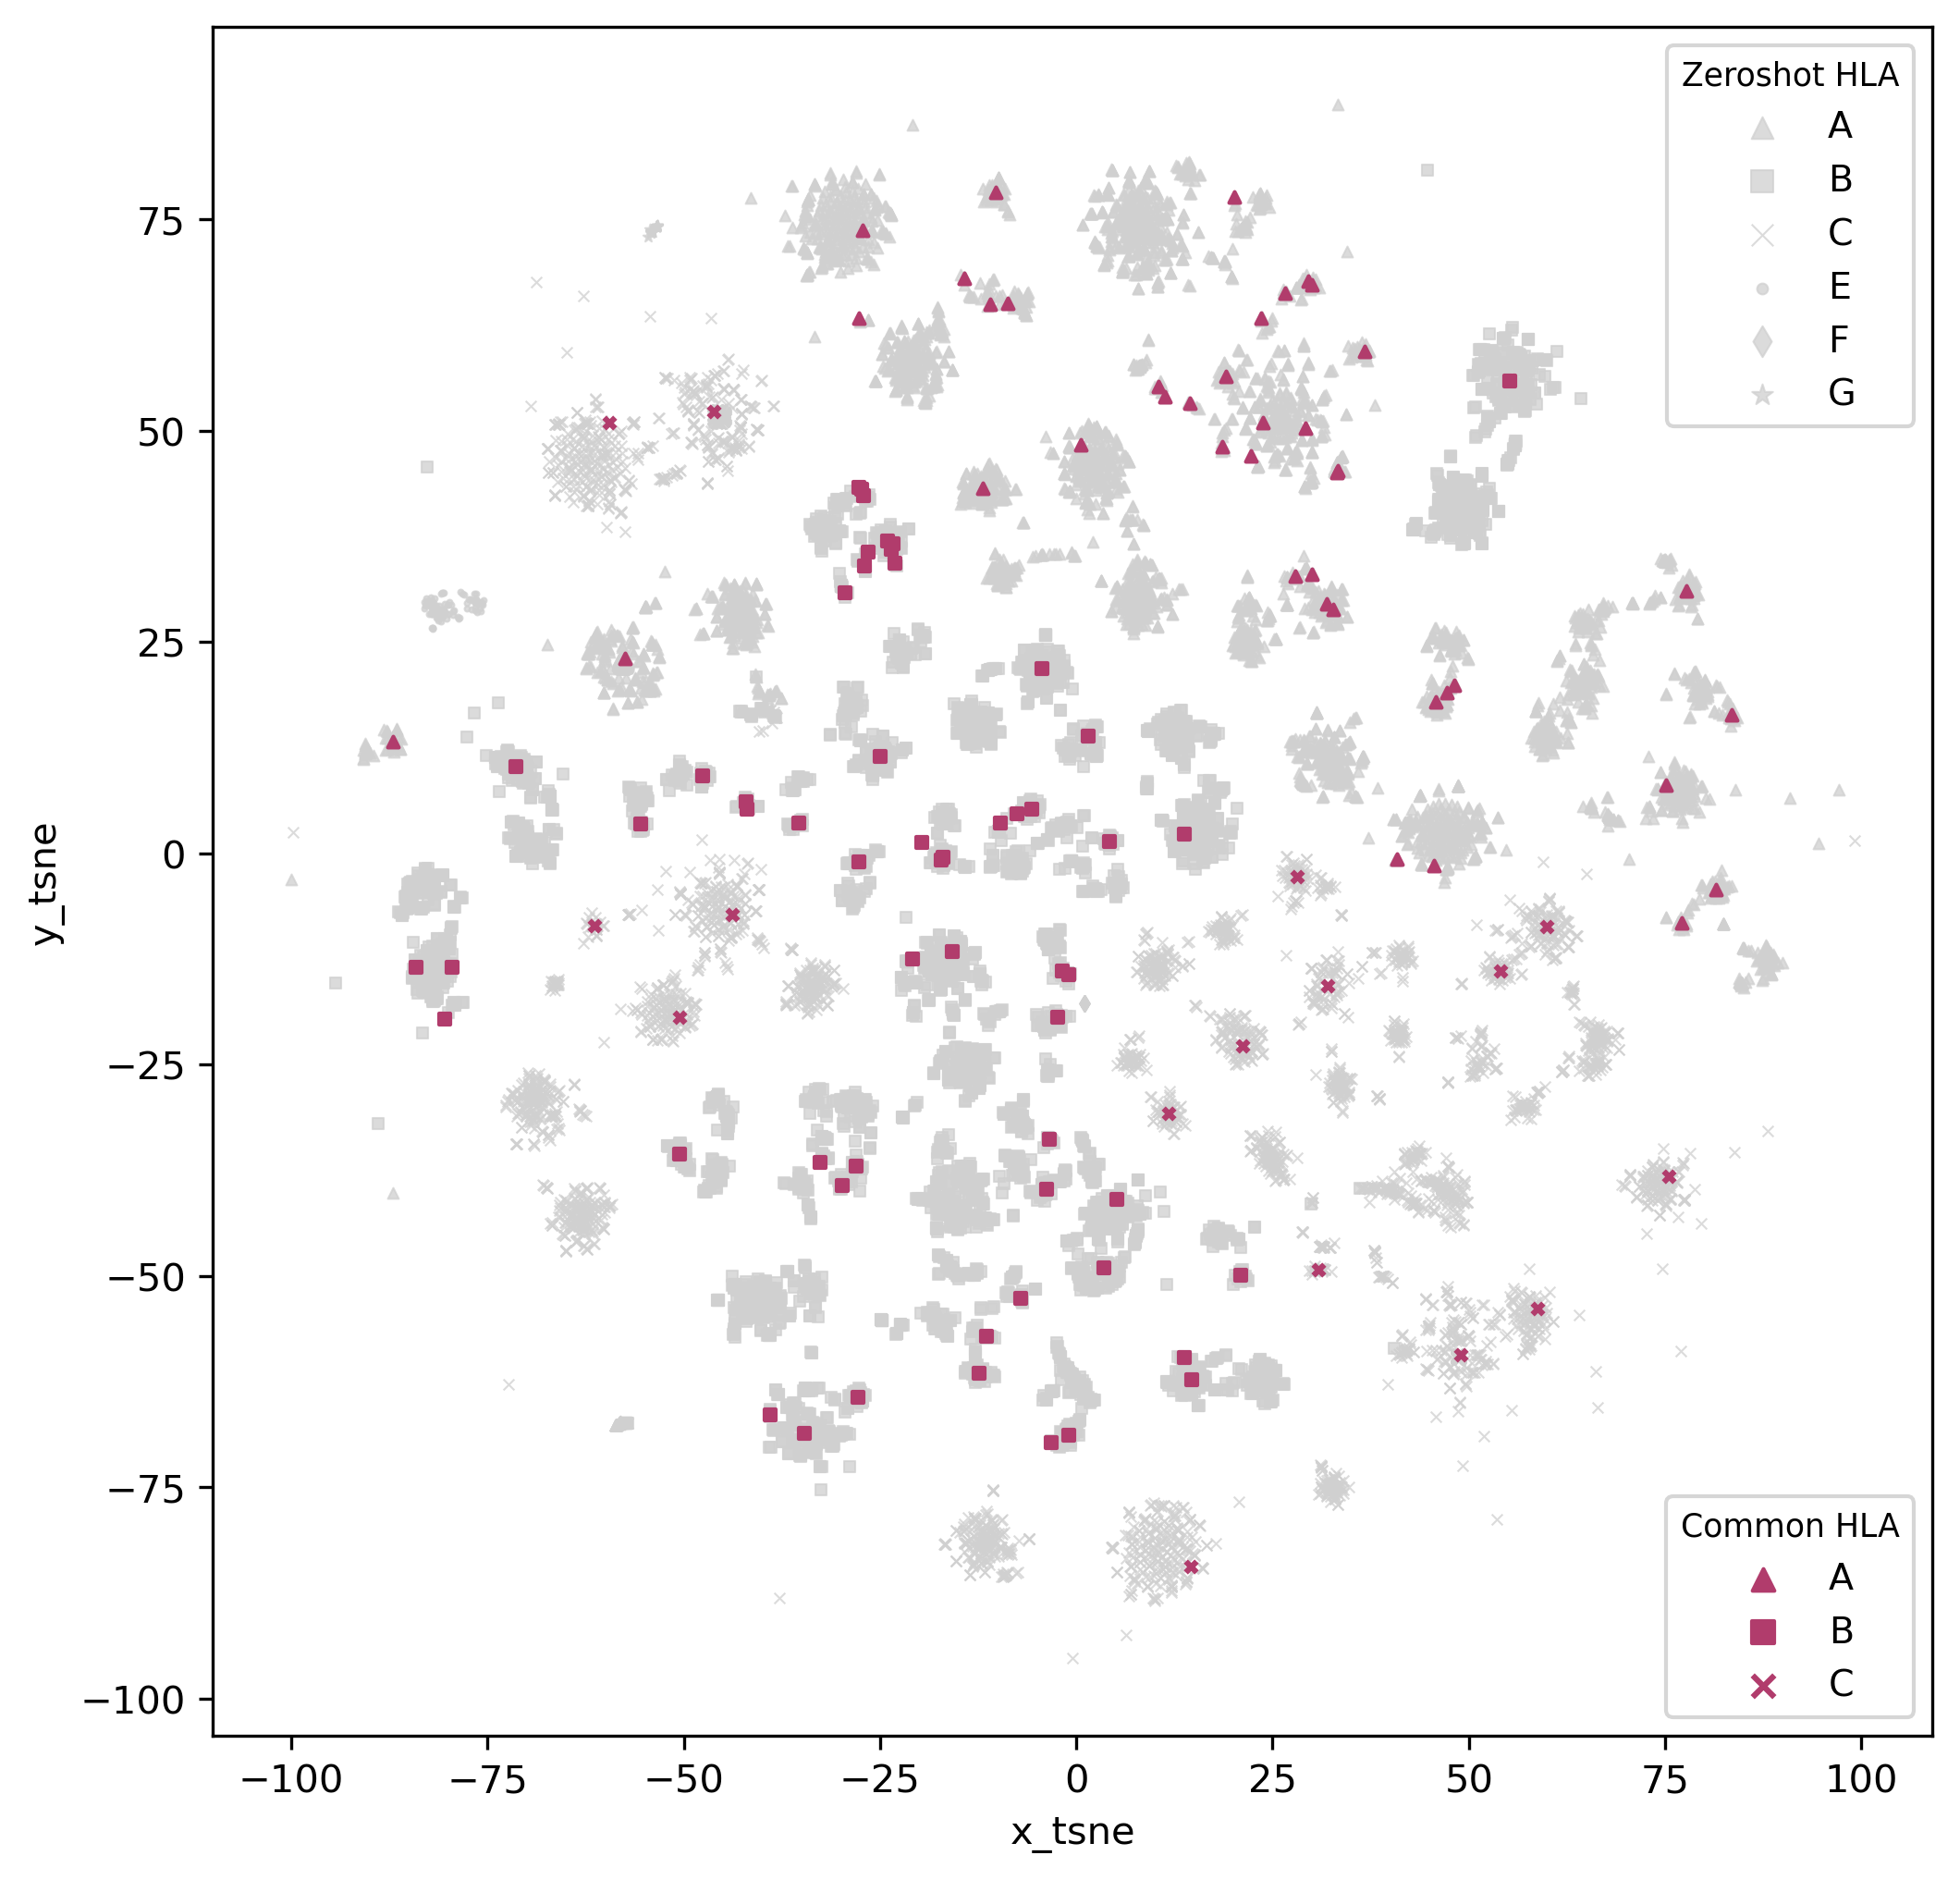

In [ ]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":8, "F":8, "G":8}
allotypes = ['A', 'B', 'C', 'E', 'F', 'G']

df_tsne_zeroshot = df_tsne[df_tsne['class(dataset)']=="No binders"]
sca_zeroshot = []
for allotype in allotypes:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#d0d0d0', s=sizes[allotype], alpha=0.75, linewidths=0.5,
                label=allotype
                )
    sca_zeroshot.append(sca)

df_tsne_common = df_tsne[df_tsne['class(dataset)']=="Common"]
sca_common = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#b13c6c', s=sizes[allotype],
                label=allotype)
    sca_common.append(sca)

ax.set_xlabel('x_tsne')
ax.set_ylabel('y_tsne')
ax.legend(handles=sca_zeroshot, title="Zeroshot HLA", frameon=True, title_fontsize="small",
           fontsize=9.5, markerscale=2, loc='upper right')
leg2 = Legend(ax, sca_common, labels=['A','B','C'], title="Common HLA", frameon=True, title_fontsize="small",
              fontsize=9.5, markerscale=2, loc='lower right')
ax.add_artist(leg2)
# handles, labels = g.get_legend_handles_labels()
# labels = ['A - no binders', 'A - common', 'E - no binders', 
#           'B - no binders', 'B - common', 'F - no binders', 
#           'C - no binders', 'C - common', 'G - no binders', ]
# ax.legend(handles=handles, labels=labels)

# plt.legend(labels, title=None, frameon=False,
#            loc="lower center",
#             bbox_to_anchor=[0.5,-0.15],
#             ncol = 3, fontsize=10.5)
# plt.savefig("./pngs/repr_2d.png", dpi=300, bbox_inches='tight')
plt.show()

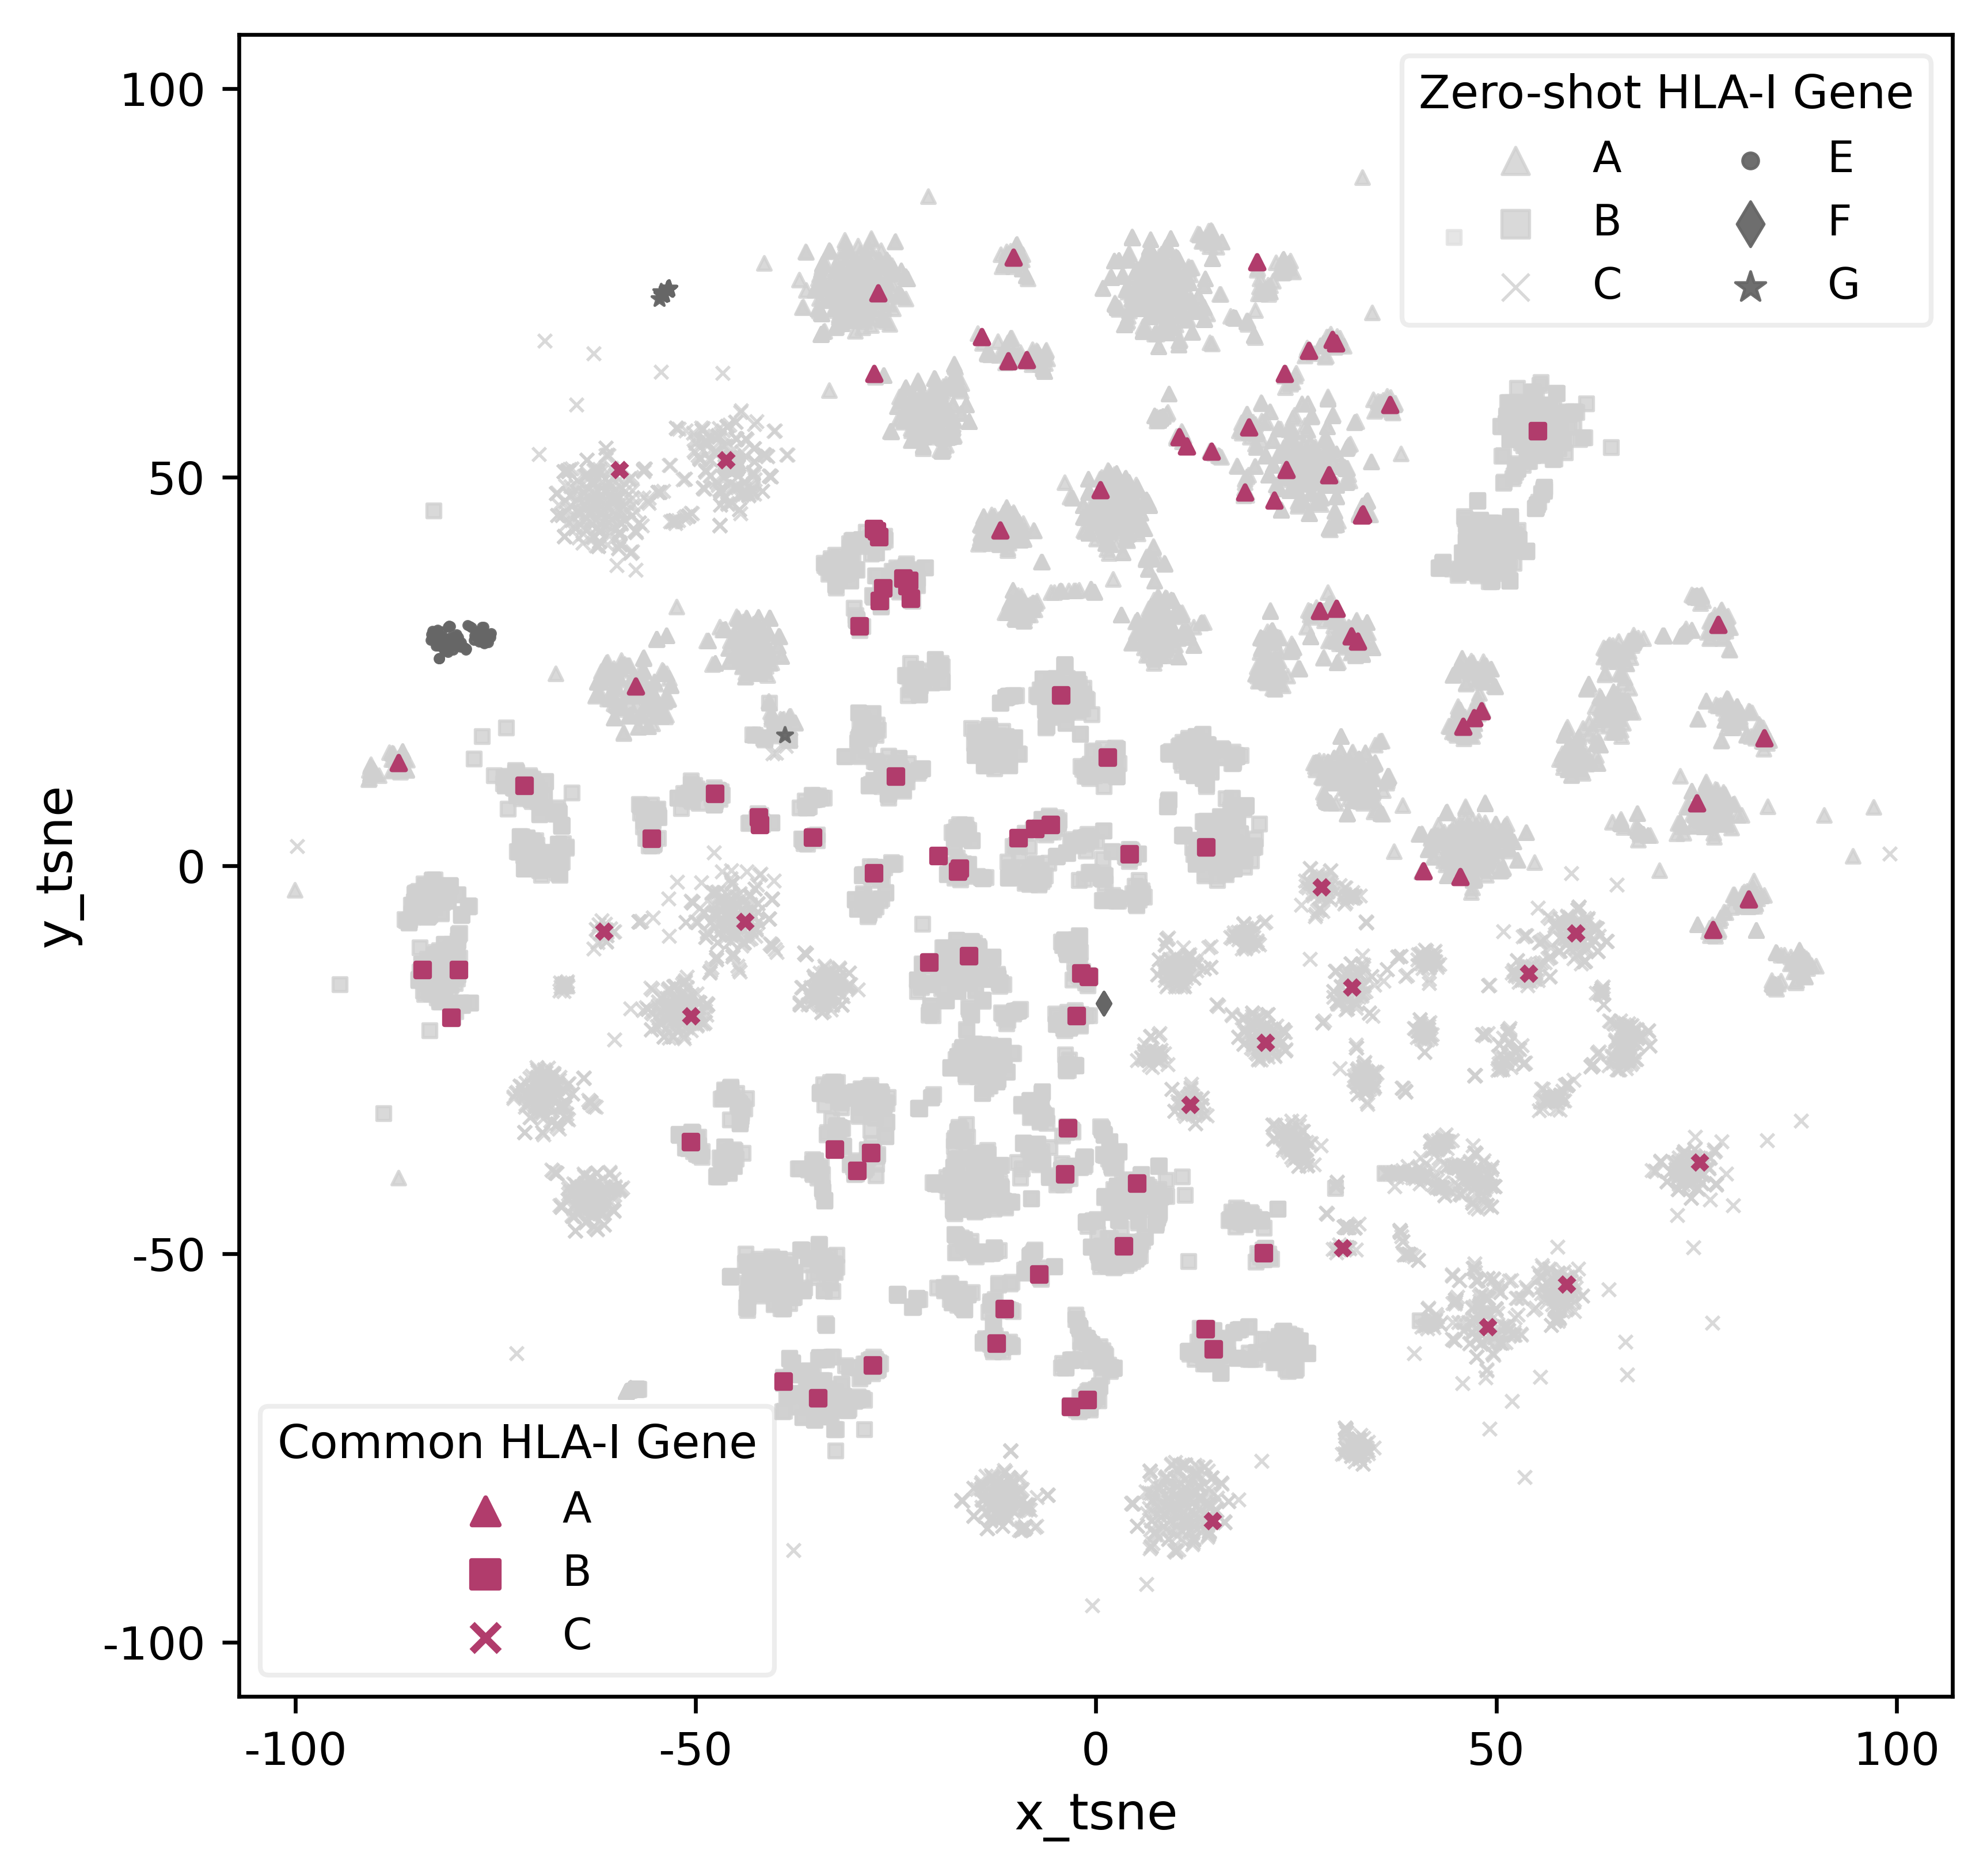

In [124]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6.4,6.25))
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotypes = ['A', 'B', 'C', 'E', 'F', 'G']

df_tsne_zeroshot = df_tsne[df_tsne['class(dataset)']=="No binders"]
sca_zeroshot = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#d0d0d0', s=sizes[allotype], alpha=0.8, linewidths=0.65,
                label=allotype
                )
    sca_zeroshot.append(sca)
for allotype in allotypes[3:]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#666666', s=sizes[allotype], alpha=0.95, linewidths=0.6,
                label=allotype
                )
    sca_zeroshot.append(sca)

df_tsne_common = df_tsne[df_tsne['class(dataset)']=="Common"]
sca_common = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#b13c6c', s=sizes[allotype],
                label=allotype)
    sca_common.append(sca)

ax.set_xlabel('x_tsne', fontsize=10.5)
ax.set_ylabel('y_tsne', fontsize=10.5)
ax.set_xlim((-107,107))
ax.set_ylim((-107,107))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=9.5)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=9.5)

ax.legend(handles=sca_zeroshot, title="Zero-shot HLA-I Gene", frameon=True, title_fontsize=9.6,
           framealpha=0.35, ncol=2, fontsize=8.9, markerscale=2, loc='upper right')
leg2 = Legend(ax, sca_common, labels=['A','B','C'], title="Common HLA-I Gene", frameon=True, title_fontsize=9.6,
              framealpha=0.35,ncol=1, fontsize=8.9, markerscale=2, loc='lower left')
ax.add_artist(leg2)

# plt.savefig("./pngs/part1_tsne.svg", format='svg', dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/part1_tsne.png", dpi=600, bbox_inches='tight')
plt.show()

---
#### Supertype

In [13]:
X_tsne_data = np.vstack((X_tsne.T, label_list, refined_label_list, refined_label_list2, supertype_label_list)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['x_tsne', 'y_tsne', 'class(allotype)', 'class(dataset)', 'class(dataset_tag)', 'class(supertype)']) 
df_tsne[['x_tsne', 'y_tsne']] = df_tsne[['x_tsne', 'y_tsne']].astype(float)
print(df_tsne.head())

print(len(df_tsne[df_tsne['class(allotype)']=='A']))
print(len(df_tsne[df_tsne['class(allotype)']=='B']))
print(len(df_tsne[df_tsne['class(allotype)']=='C']))
print(len(df_tsne[df_tsne['class(allotype)']=='E']))
print(len(df_tsne[df_tsne['class(allotype)']=='F']))
print(len(df_tsne[df_tsne['class(allotype)']=='G']))

print(df_tsne[df_tsne['class(allotype)']=='A']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='B']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='C']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='E']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='F']['class(dataset)'].nunique())
print(df_tsne[df_tsne['class(allotype)']=='G']['class(dataset)'].nunique())

print(df_tsne[df_tsne['class(allotype)']=='A']['class(supertype)'].unique())
print(df_tsne[df_tsne['class(allotype)']=='B']['class(supertype)'].unique())

      x_tsne     y_tsne class(allotype) class(dataset) class(dataset_tag)  \
0 -57.481125  23.057611               A         Common                  1   
1 -53.108826  23.240230               A     No binders                  0   
2 -53.954727  24.728148               A     No binders                  0   
3 -58.408806  22.434860               A     No binders                  0   
4 -59.314280  26.413122               A     No binders                  0   

  class(supertype)  
0              A01  
1     Unclassified  
2              A01  
3              A01  
4              A01  
4462
5424
4162
120
7
37
3
3
3
2
1
2
['A01' 'Unclassified' 'A02' 'A01 A03' 'A03' 'A24' 'A01 A24']
['B07' 'Unclassified' 'B08' 'B62' 'B27' 'B58' 'B44']


In [14]:
df_tsne = df_tsne[df_tsne["class(dataset)"].isin(["No binders","Common"])]
df_tsne

x_tsne     y_tsne class(allotype) class(dataset) class(dataset_tag)  \
0     -57.481125  23.057611               A         Common                  1   
1     -53.108826  23.240230               A     No binders                  0   
2     -53.954727  24.728148               A     No binders                  0   
3     -58.408806  22.434860               A     No binders                  0   
4     -59.314280  26.413122               A     No binders                  0   
...          ...        ...             ...            ...                ...   
14207 -54.534824  72.939540               G     No binders                  0   
14208 -54.094578  73.612900               G     No binders                  0   
14209 -54.094578  73.612900               G     No binders                  0   
14210 -54.094578  73.612900               G     No binders                  0   
14211 -54.107105  73.596160               G     No binders                  0   

      class(supertype)  
0                  A01  
1         Unclassified  
2                  A01  
3                  A01  
4                  A01  
...                ...  
14207     Unclassified  
14208     Unclassified  
14209     Unclassified  
14210     Unclassified  
14211     Unclassified  

[14177 rows x 6 columns]

In [15]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

---

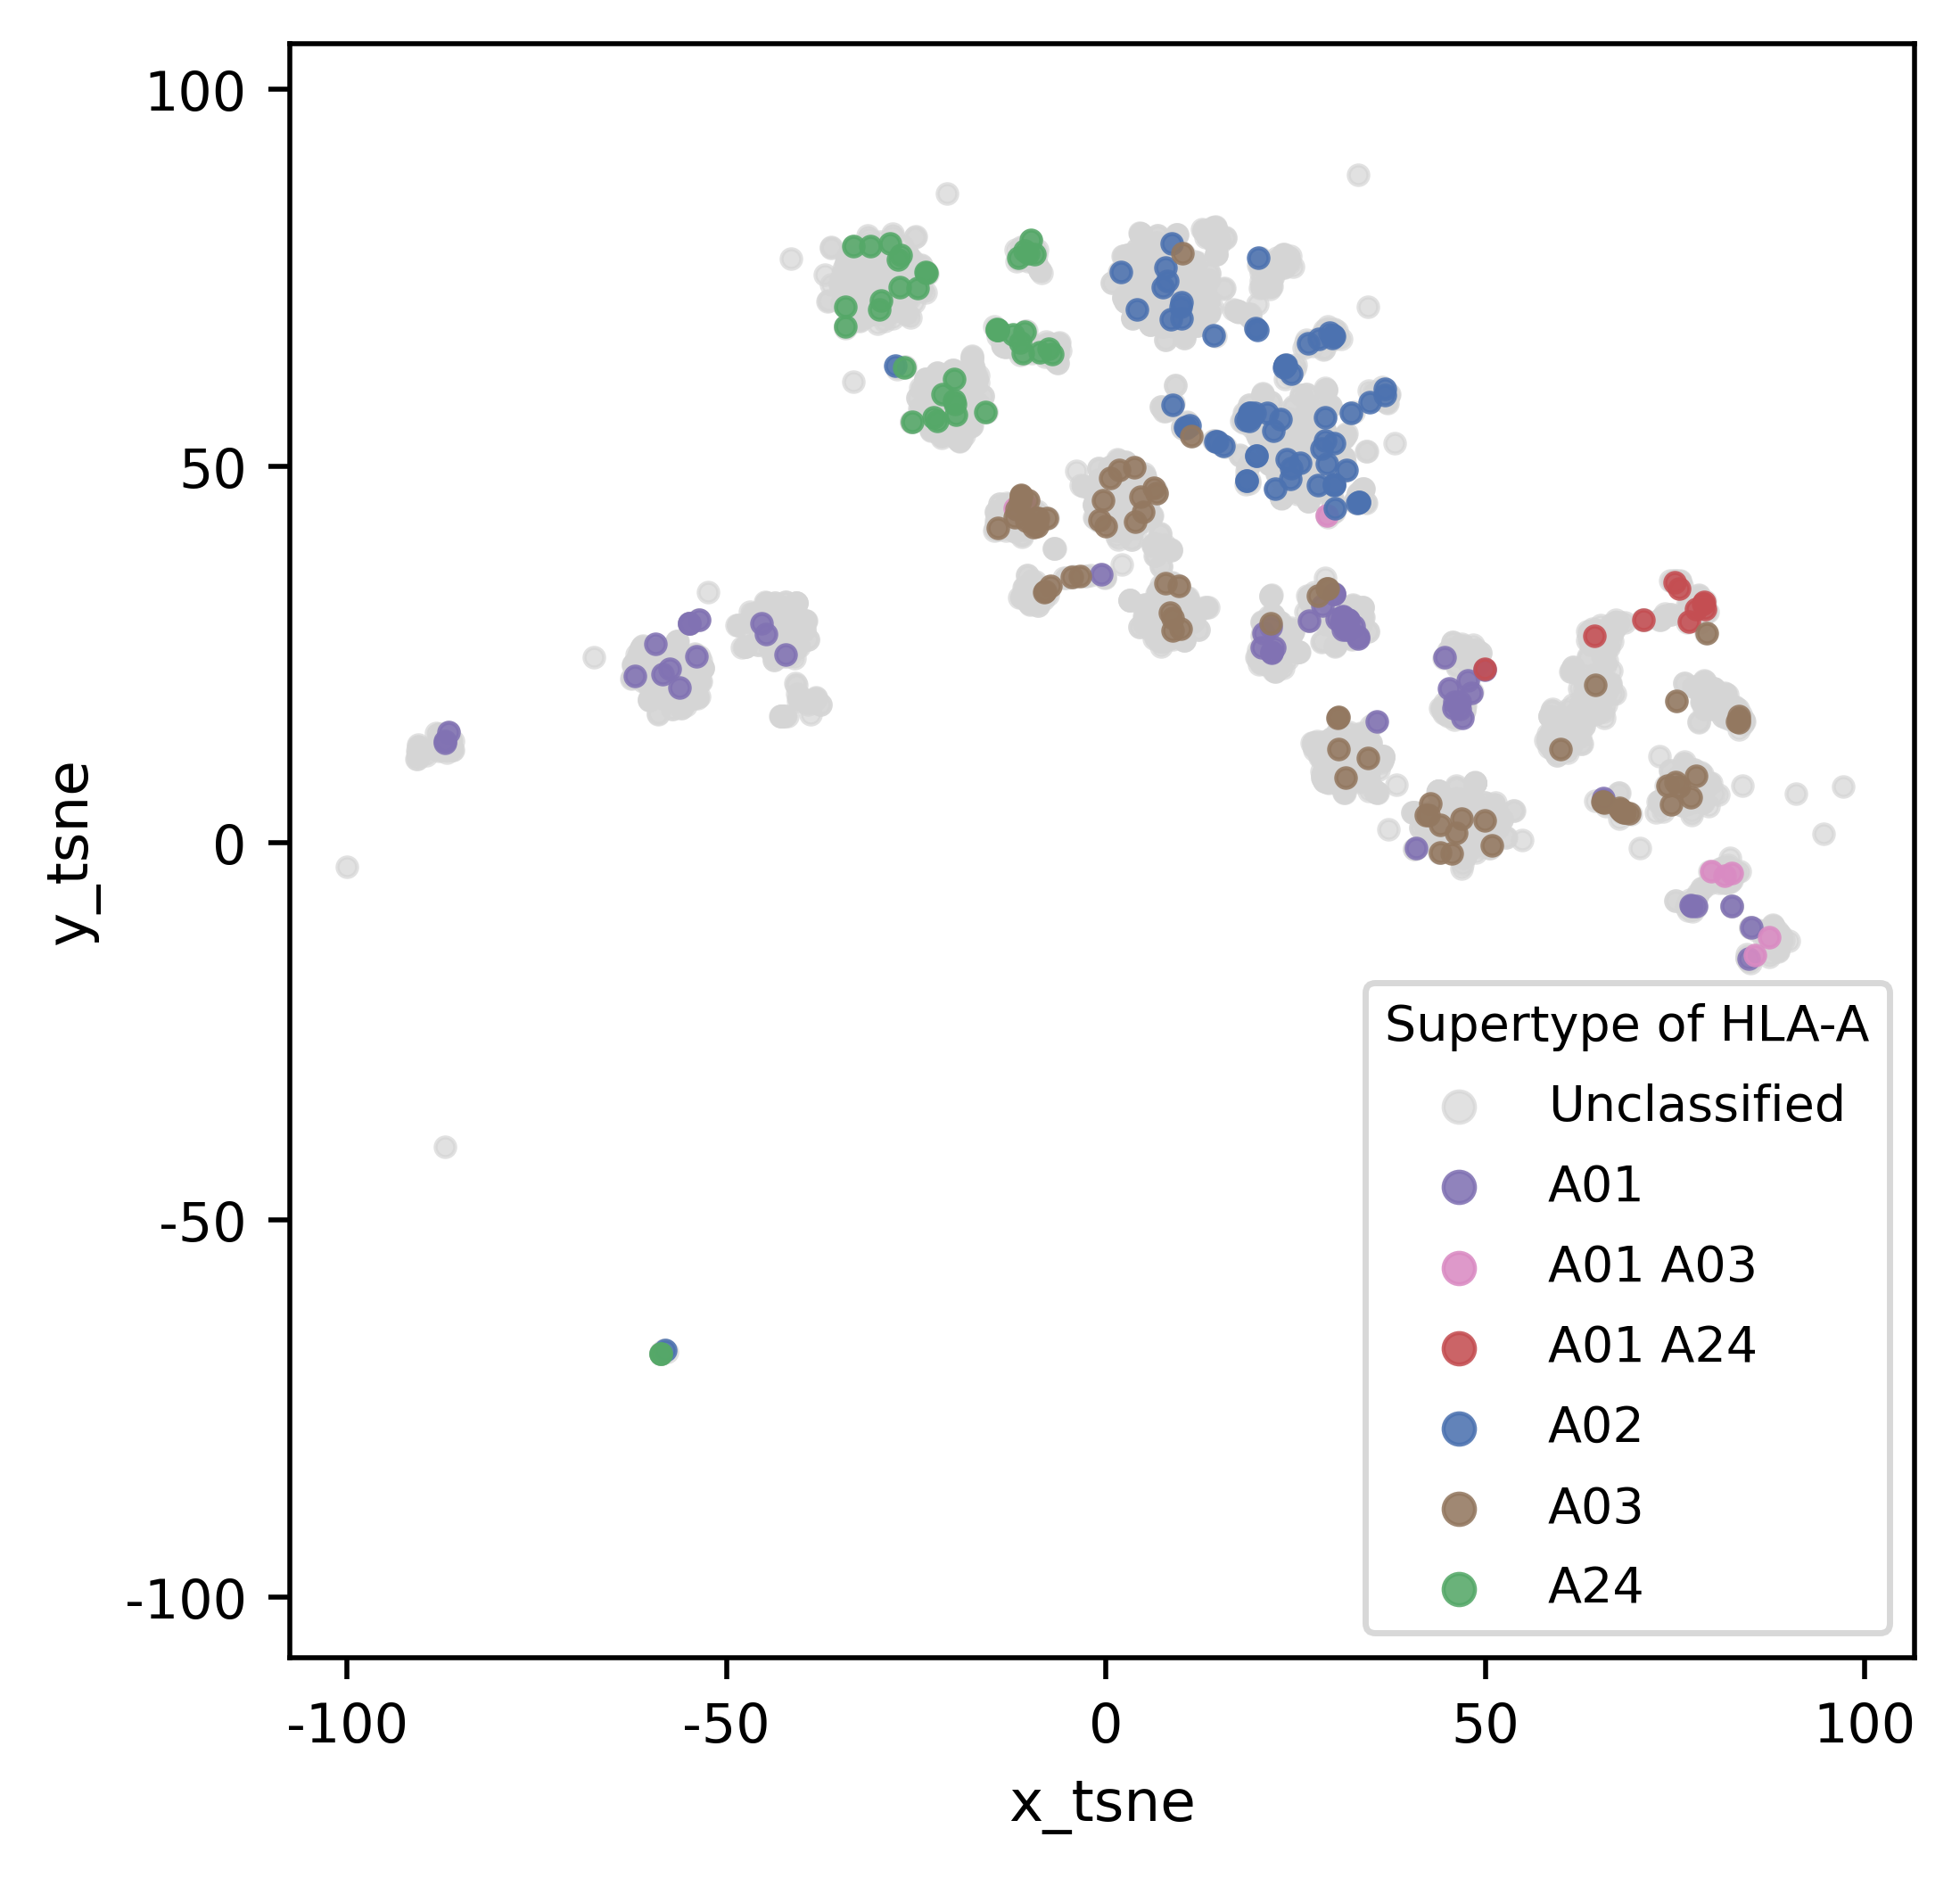

In [87]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(4.7,4.7))
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotype = ['A', 'B', 'C', 'E', 'F', 'G']
A_supertype = ['Unclassified', 'A01', 'A01 A03', 'A01 A24', 'A02', 'A03', 'A24']
colors = ['#d5d5d5', '#8172b3','#da8bc3', '#c44e52', '#4c72b0', '#937860', '#55a868']
# colors = ['#d0d0d0', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5']

df_tsne_A = df_tsne[df_tsne['class(allotype)']=="A"]
sca_Asupertype = []
for ind, supertype in enumerate(A_supertype):
    sca = ax.scatter(df_tsne_A[df_tsne_A["class(supertype)"]==supertype].iloc[:,0], 
                df_tsne_A[df_tsne_A["class(supertype)"]==supertype].iloc[:,1], 
                marker='o',
                c=colors[ind], 
                s=10  if supertype=='Unclassified' else 10,
                alpha=0.7 if supertype=='Unclassified' else 0.88,   # 0.5
                linewidths=0.65, label=supertype
                )
    sca_Asupertype.append(sca)

# ax.set_xlabel('x_tsne', fontsize=10.5)
# ax.set_ylabel('y_tsne', fontsize=10.5)
# ax.set_xlim((-107,107))
# ax.set_ylim((-107,100))
# ax.set_xticks([-100,-50,0,50,100])
# ax.set_yticks([-100,-50,0,50,100])
# ax.set_xticklabels([-100,-50,0,50,100], fontsize=9.5)
# ax.set_yticklabels([-100,-50,0,50,100], fontsize=9.5)
ax.set_xlabel('x_tsne', fontsize=9.3)
ax.set_ylabel('y_tsne', fontsize=9.3)
ax.set_xlim((-107.5,106.5))
ax.set_ylim((-108,106))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=8.7)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=8.7)

ax.legend(handles=sca_Asupertype, title="Supertype of HLA-A", frameon=True, title_fontsize=8,
           labelspacing=0.65,framealpha=0.75, ncol=1, fontsize=8, markerscale=1.6, loc='lower right')

# plt.savefig("./pngs/part1_tsne_Asupertype.png", dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/sup1-4_1_gai.svg", format='svg', dpi=300, bbox_inches='tight')
# plt.savefig("./pngs/sup1-4_1_gai.png", dpi=500, bbox_inches='tight')
plt.show()

In [25]:
pal = "deep"
print(sns.color_palette(pal).as_hex())
sns.color_palette(pal)

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

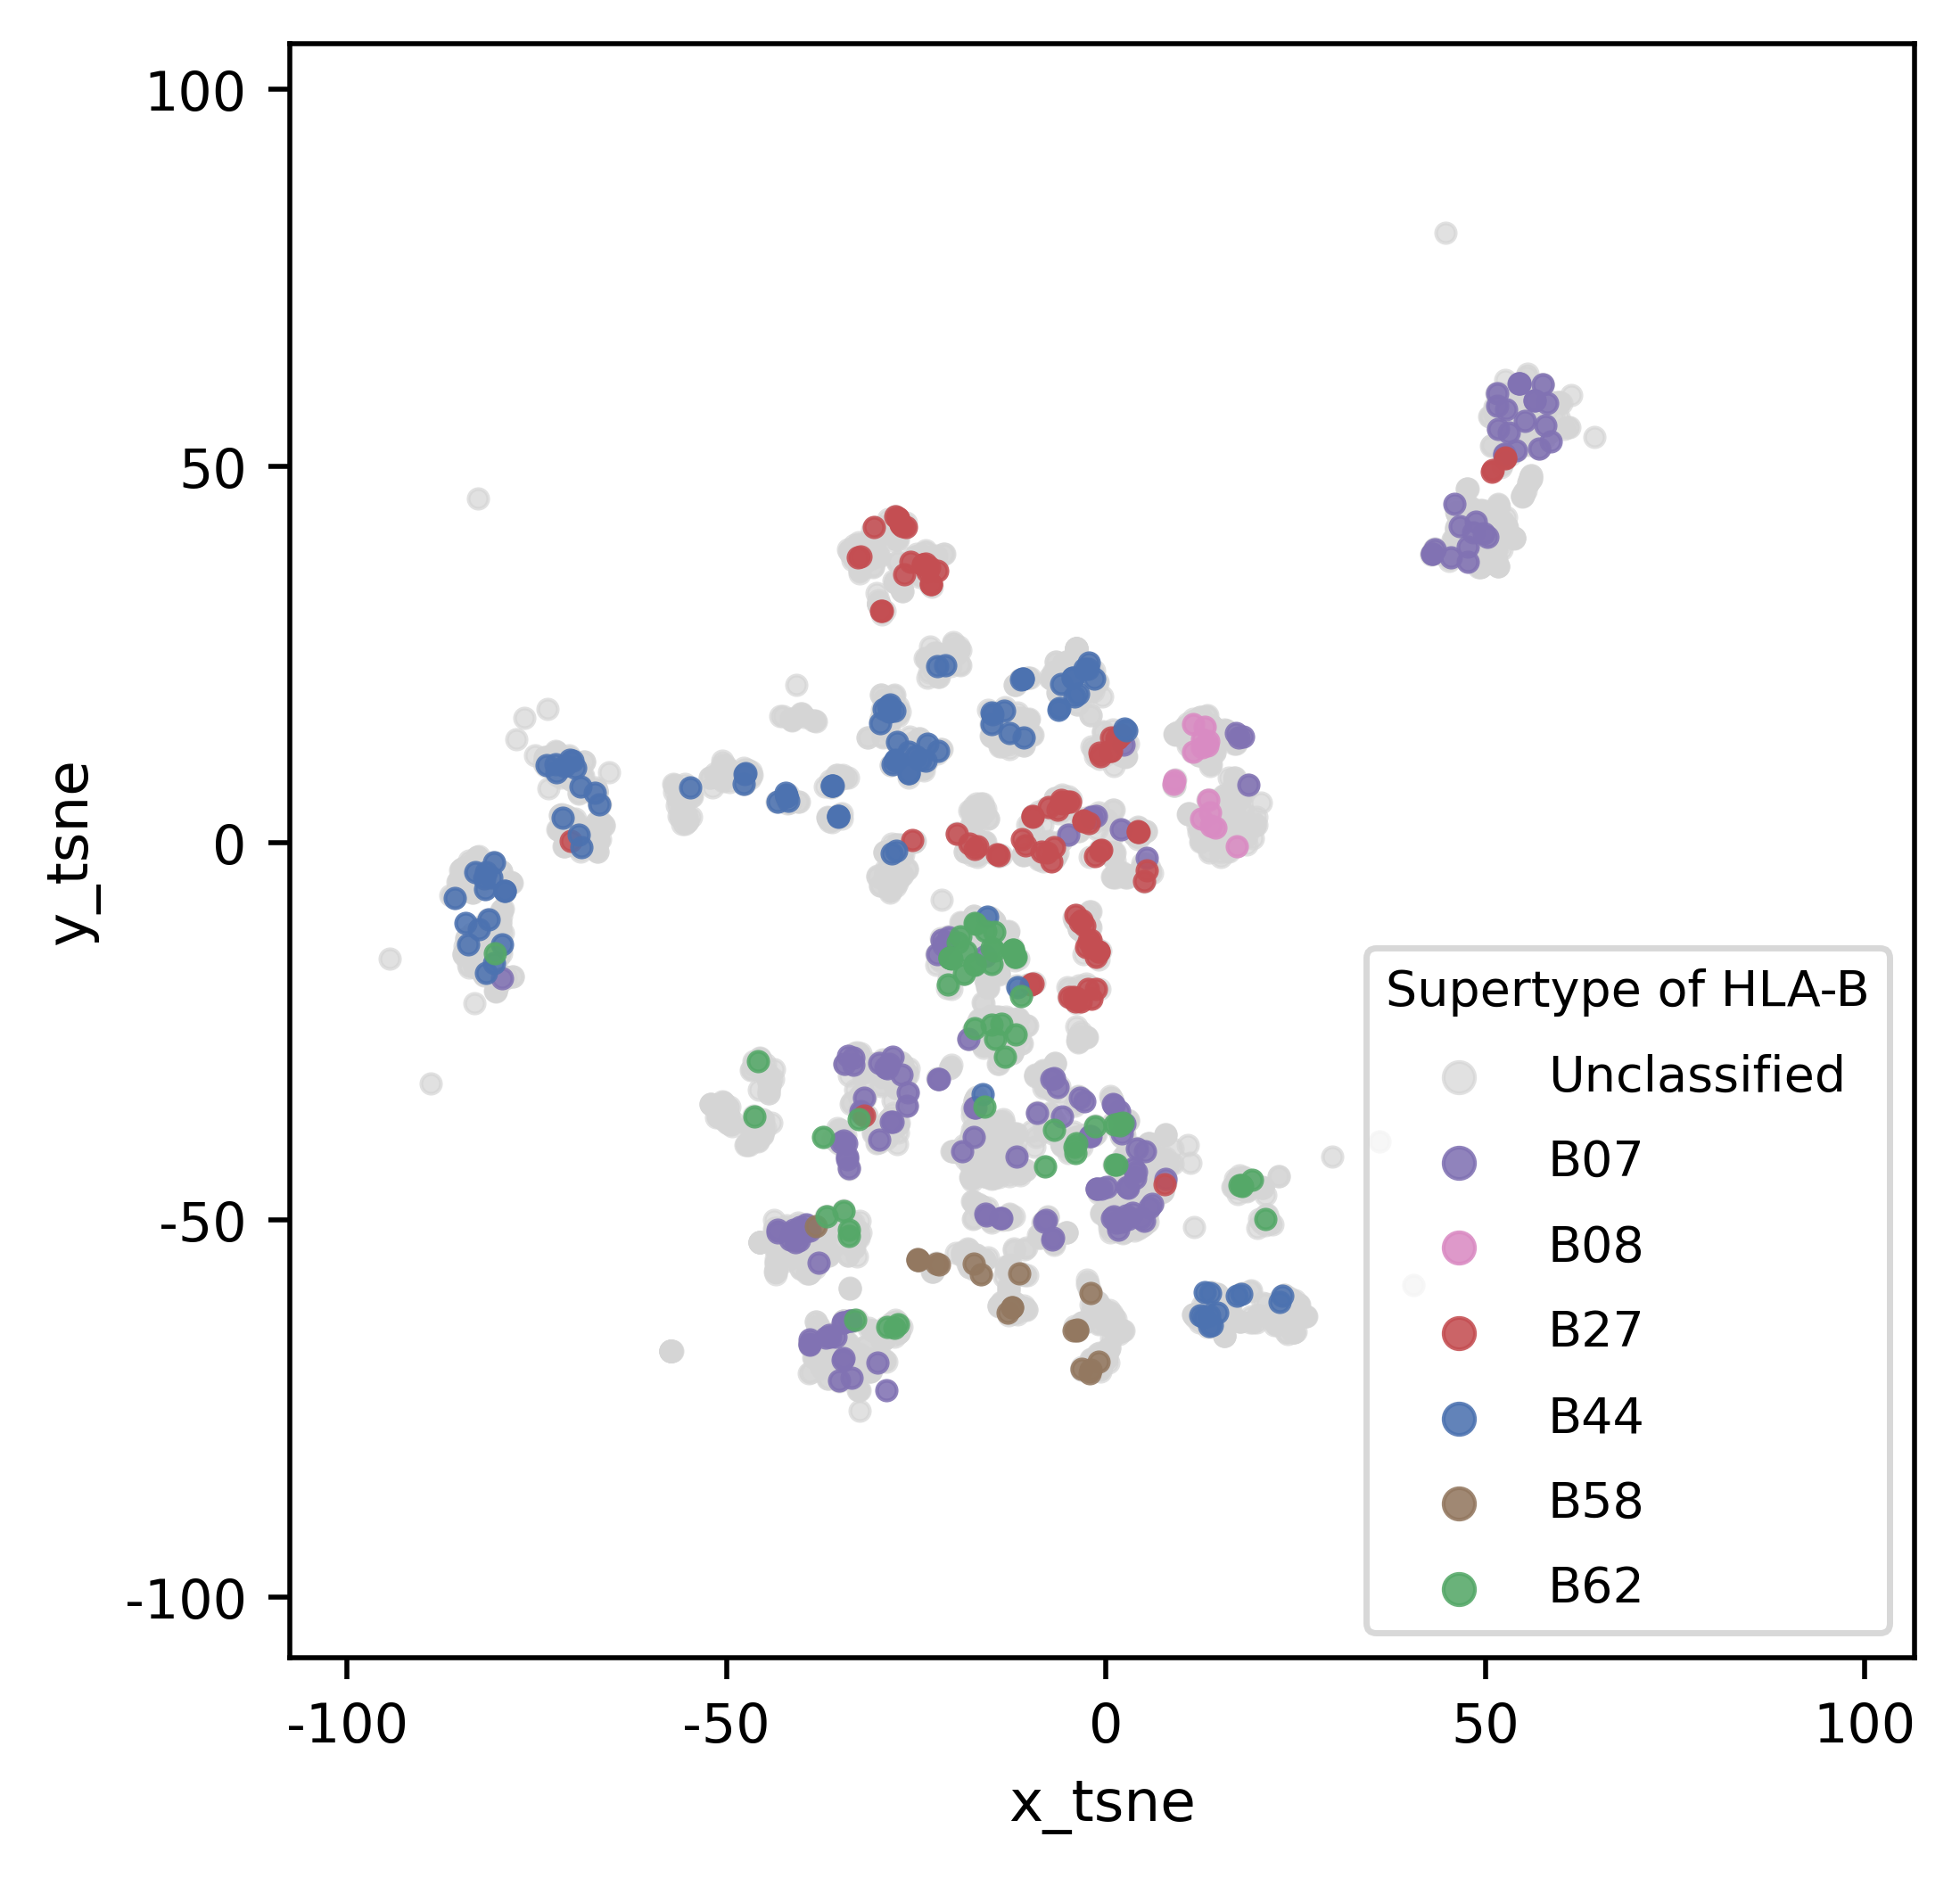

In [88]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(4.7,4.7))    # 6.4, 6.25
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotype = ['A', 'B', 'C', 'E', 'F', 'G']
B_supertype = ['Unclassified', 'B07', 'B08', 'B27', 'B44', 'B58', 'B62']
colors = ['#d5d5d5', '#8172b3','#da8bc3', '#c44e52', '#4c72b0', '#937860', '#55a868']
# colors = ['#cfcfcf', '#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4']

df_tsne_B = df_tsne[df_tsne['class(allotype)']=="B"]
sca_Asupertype = []
for ind, supertype in enumerate(B_supertype):
    sca = ax.scatter(df_tsne_B[df_tsne_B["class(supertype)"]==supertype].iloc[:,0], 
                df_tsne_B[df_tsne_B["class(supertype)"]==supertype].iloc[:,1], 
                marker='o',
                c=colors[ind], 
                s=10 if supertype=='Unclassified' else 10,
                alpha=0.7 if supertype=='Unclassified' else 0.88,       # 0.5
                linewidths=0.6, label=supertype
                )
    sca_Asupertype.append(sca)

ax.set_xlabel('x_tsne', fontsize=9.3)
ax.set_ylabel('y_tsne', fontsize=9.3)
ax.set_xlim((-107.5,106.5))
ax.set_ylim((-108,106))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=8.7)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=8.7)

ax.legend(handles=sca_Asupertype, title="Supertype of HLA-B", frameon=True, title_fontsize=8,
           labelspacing=0.75,framealpha=0.75, ncol=1, fontsize=8, markerscale=1.6, loc='lower right')

# plt.savefig("./pngs/part1_tsne_Bsupertype.png", dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/sup1-4_2_gai.svg", format='svg', dpi=300, bbox_inches='tight')
# plt.savefig("./pngs/sup1-4_2_gai.png", dpi=500, bbox_inches='tight')
plt.show()

---

overall + supertype

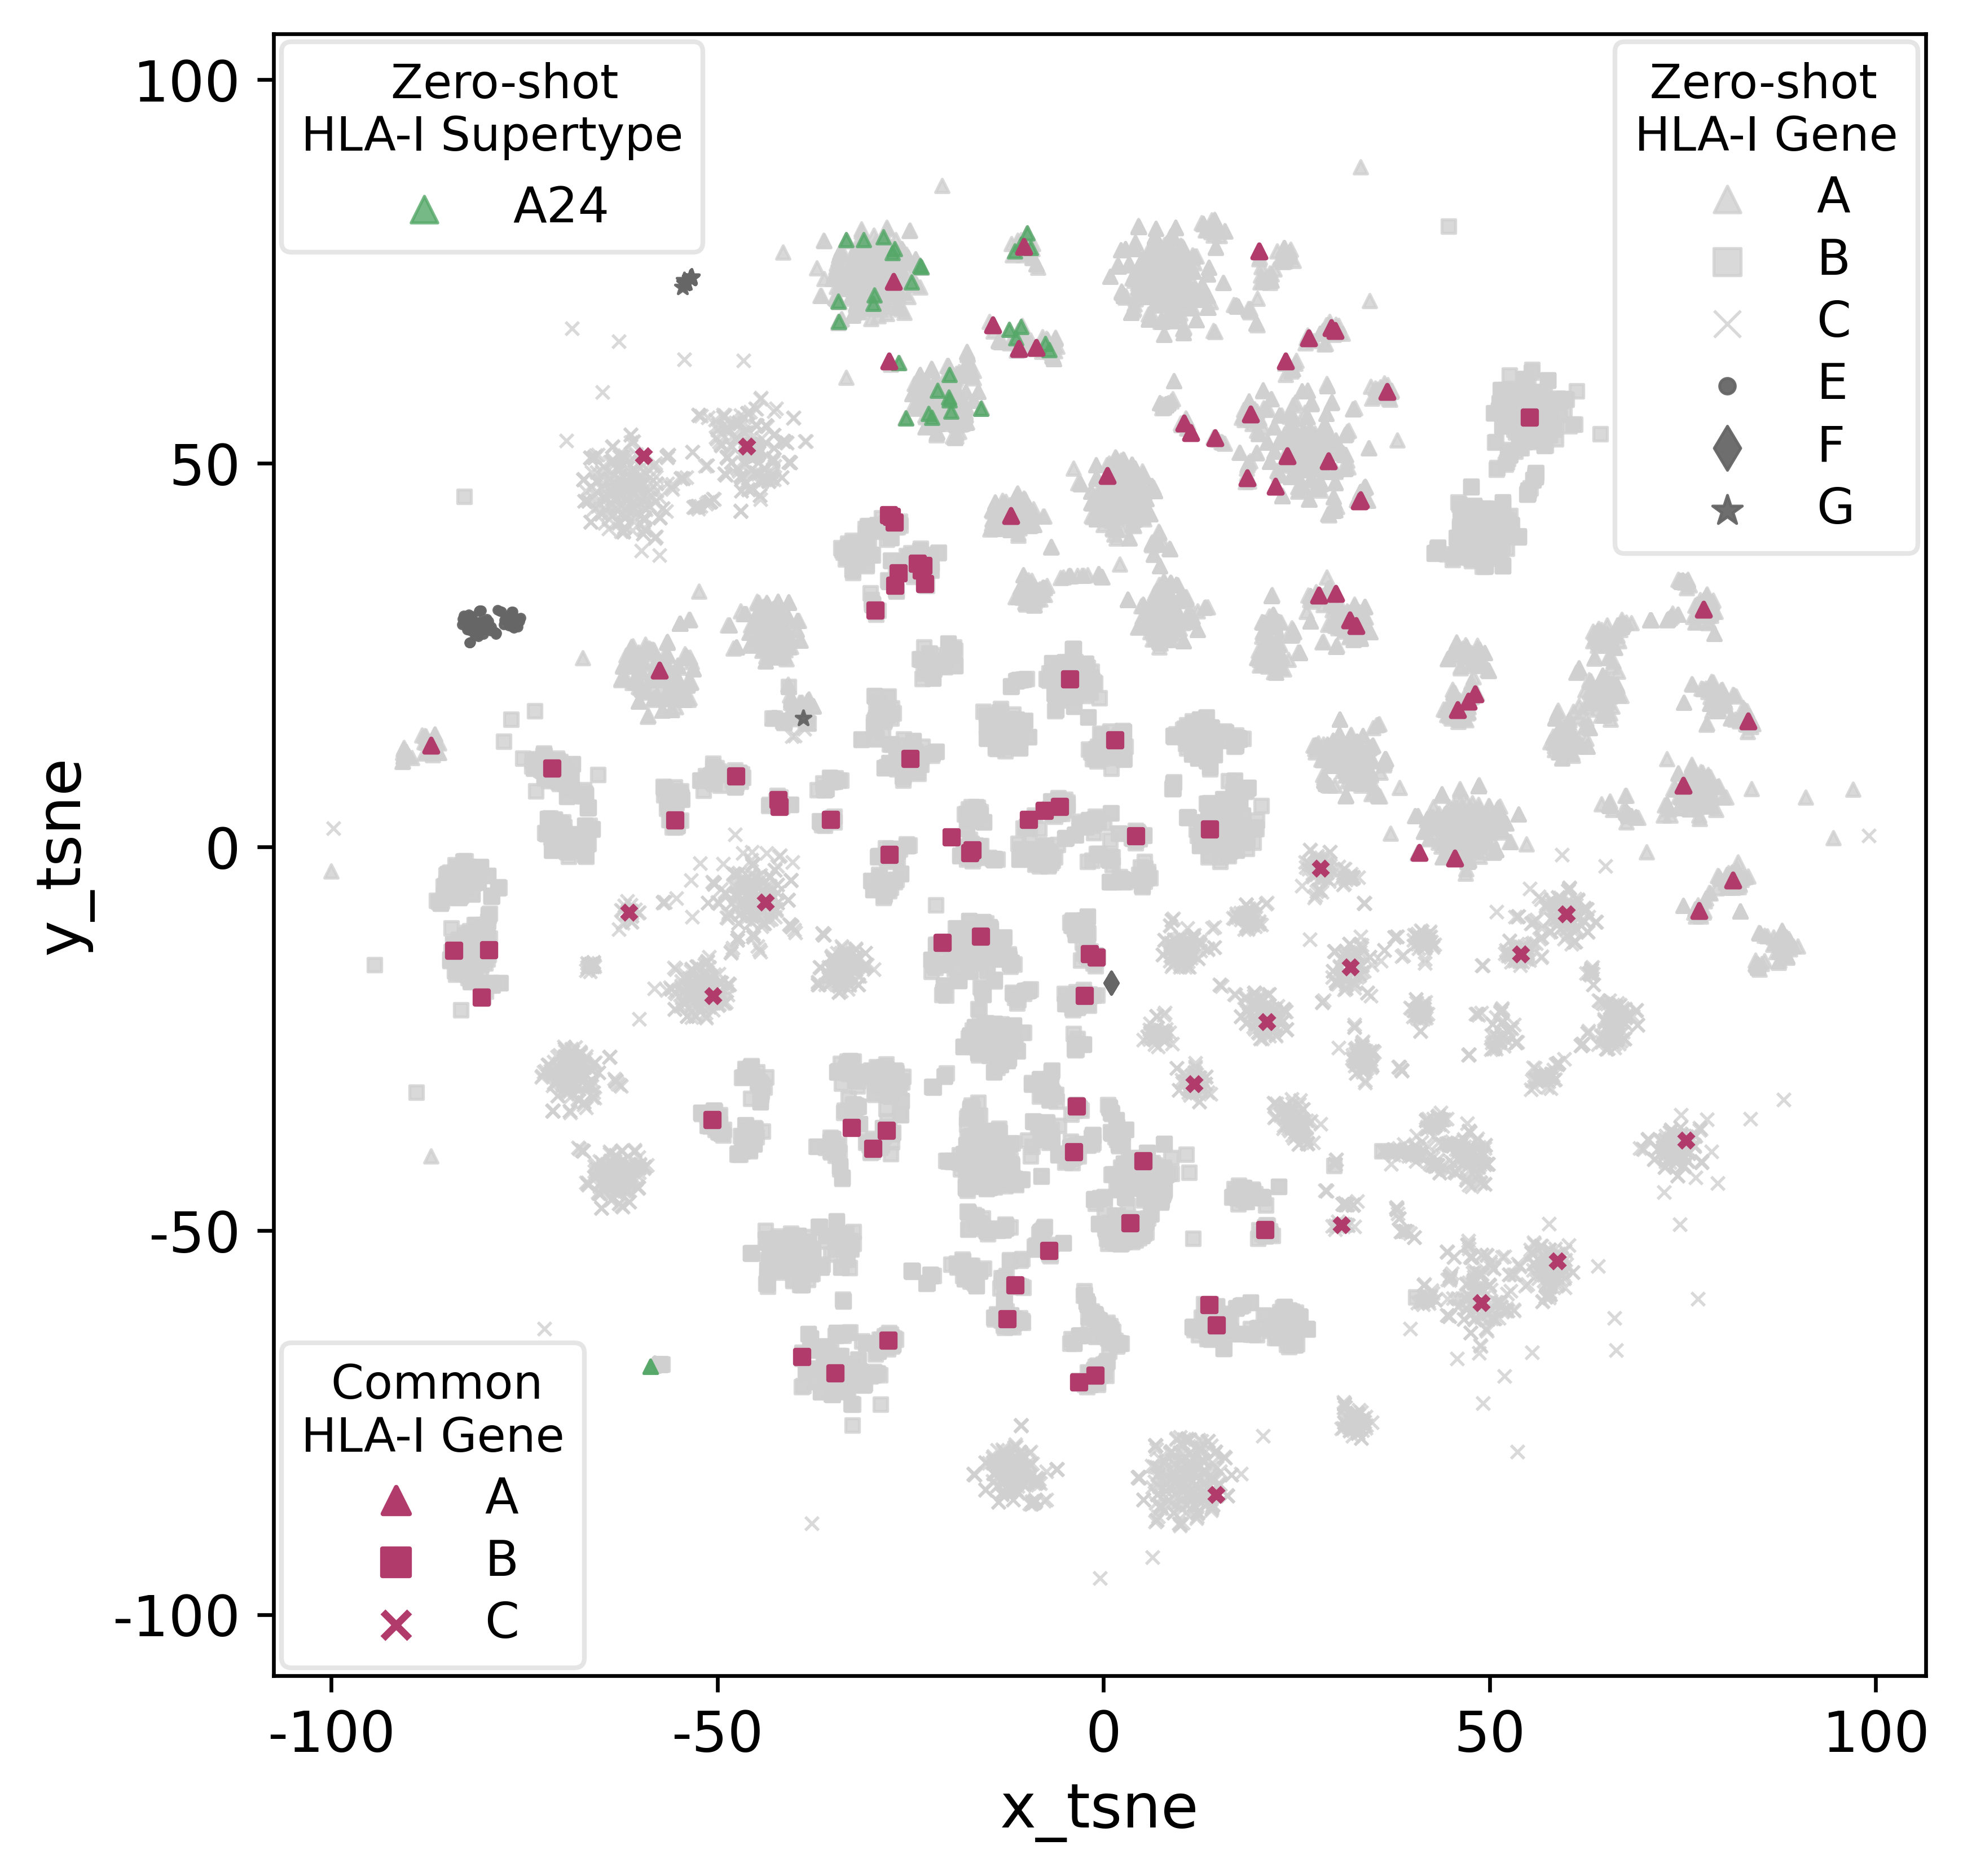

In [178]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6.3,6.3))
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotypes = ['A', 'B', 'C', 'E', 'F', 'G']

df_tsne_zeroshot = df_tsne[df_tsne['class(dataset)']=="No binders"]
sca_zeroshot = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#d0d0d0', s=sizes[allotype], alpha=0.8, linewidths=0.65,
                label=allotype
                )                            # light gray
    sca_zeroshot.append(sca)
for allotype in allotypes[3:]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#666666', s=sizes[allotype], alpha=0.95, linewidths=0.6,
                label=allotype
                )                            # dark gray
    sca_zeroshot.append(sca)

selected_supertype = "A24"
df_tsne_zs_A24 = df_tsne_zeroshot[df_tsne_zeroshot["class(supertype)"]==selected_supertype]
sca_a24 = ax.scatter(df_tsne_zs_A24.iloc[:,0], 
                df_tsne_zs_A24.iloc[:,1], 
                marker=markers[selected_supertype[0]], c='#55a868',
                s=sizes[selected_supertype[0]], alpha=0.8, linewidths=0.65,
                label=selected_supertype
                )

df_tsne_common = df_tsne[df_tsne['class(dataset)']=="Common"]
sca_common = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#b13c6c', s=sizes[allotype],
                label=allotype)
    sca_common.append(sca)

ax.set_xlabel('x_tsne', fontsize=13)
ax.set_ylabel('y_tsne', fontsize=13)
ax.set_xlim((-107.5,106.5))
ax.set_ylim((-108,106))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=12)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=12)

ax.legend(handles=sca_zeroshot, title=" Zero-shot\nHLA-I Gene", frameon=True, title_fontsize=10,
           framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='upper right', labelspacing=0.3,
           bbox_to_anchor=[1.01,1.01],
        #    facecolor="#a1c9f4"
           )
leg2 = Legend(ax, sca_common, labels=['A','B','C'], title="  Common\nHLA-I Gene", frameon=True, title_fontsize=10,
              framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='lower left', labelspacing=0.3,
              bbox_to_anchor=[-0.01,-0.01],
            #   facecolor="#a1c9f4"
              )
ax.add_artist(leg2)
leg3 = Legend(ax, [sca_a24], labels=["A24"], title="      Zero-shot\nHLA-I Supertype", frameon=True, title_fontsize=10,
              framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='upper left',
              bbox_to_anchor=[-0.01,1.01]
              )
ax.add_artist(leg3)

# plt.savefig("./pngs/1-3_1.svg", format='svg', dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/1-3_2.png", dpi=600, bbox_inches='tight')
plt.show()

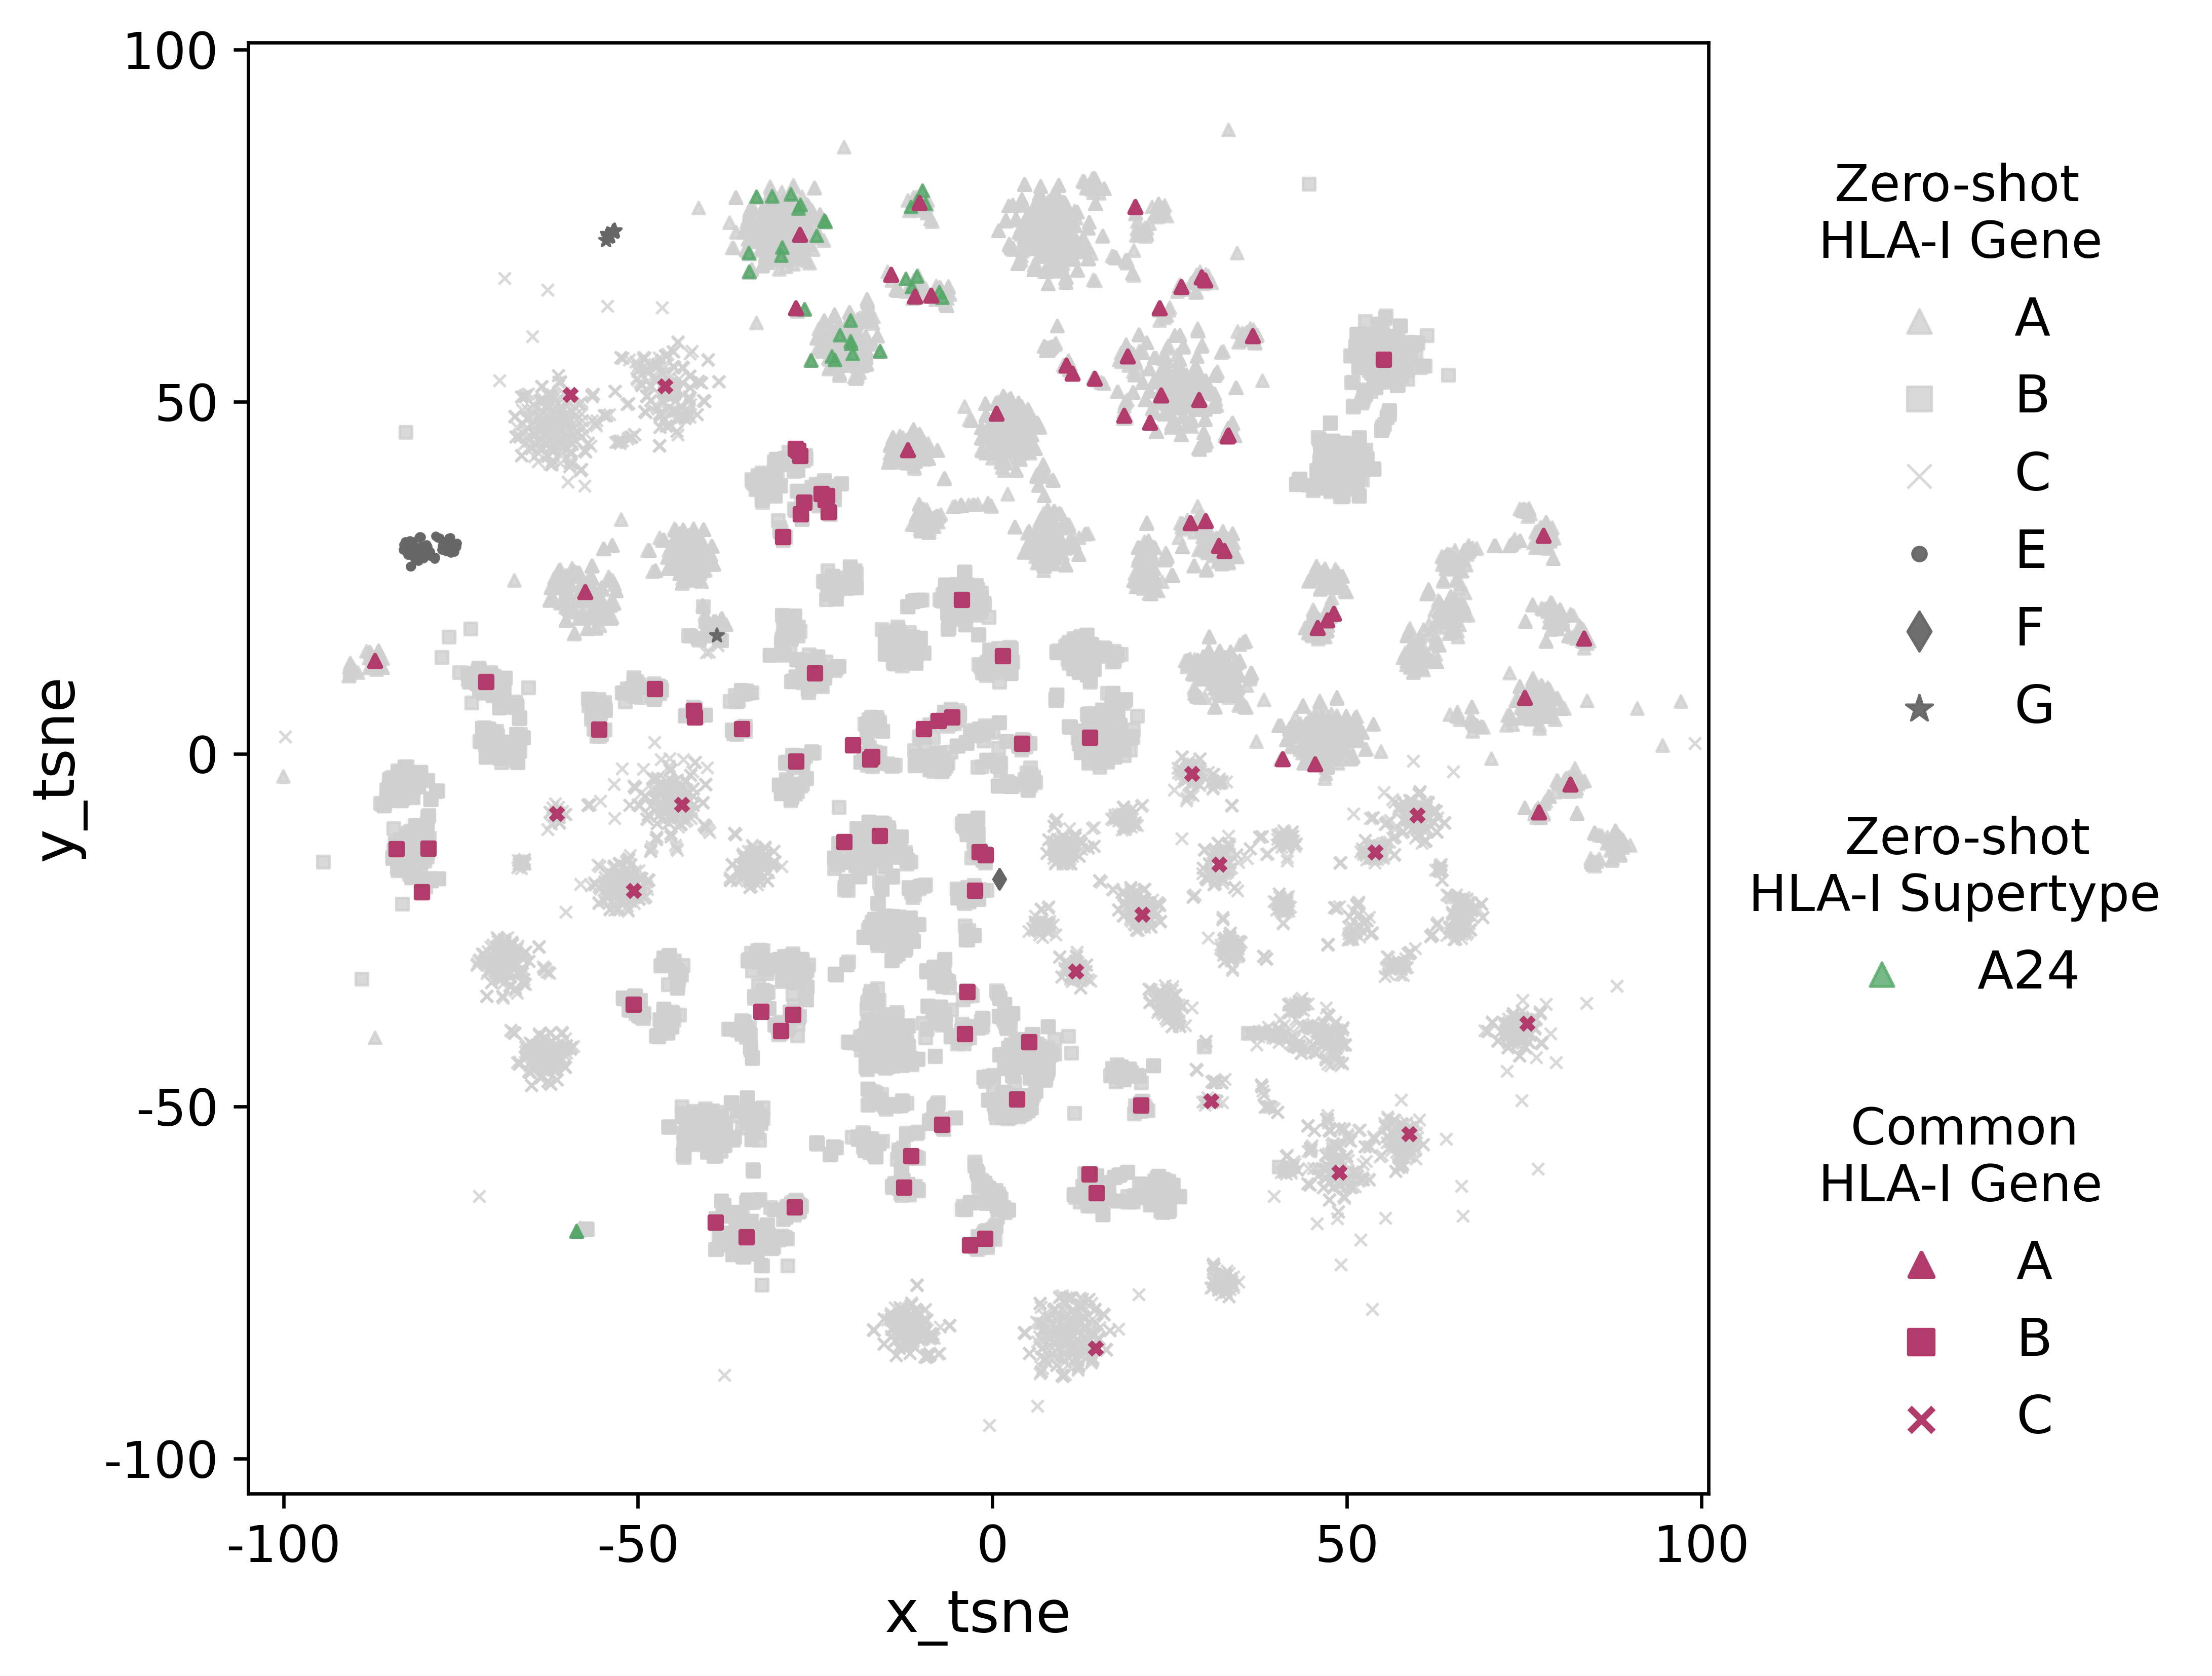

In [152]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6.2,6.2))
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"^", "B":"s", "C":"x", "E":".", "F":"d", "G":"*"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotypes = ['A', 'B', 'C', 'E', 'F', 'G']

df_tsne_zeroshot = df_tsne[df_tsne['class(dataset)']=="No binders"]
sca_zeroshot = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#d0d0d0', s=sizes[allotype], alpha=0.8, linewidths=0.65,
                label=allotype
                )                            # light gray
    sca_zeroshot.append(sca)
for allotype in allotypes[3:]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#666666', s=sizes[allotype], alpha=0.95, linewidths=0.6,
                label=allotype
                )                            # dark gray
    sca_zeroshot.append(sca)

selected_supertype = "A24"
df_tsne_zs_A24 = df_tsne_zeroshot[df_tsne_zeroshot["class(supertype)"]==selected_supertype]
sca_a24 = ax.scatter(df_tsne_zs_A24.iloc[:,0], 
                df_tsne_zs_A24.iloc[:,1], 
                marker=markers[selected_supertype[0]], c='#55a868',
                s=sizes[selected_supertype[0]], alpha=0.8, linewidths=0.65,
                label=selected_supertype
                )

df_tsne_common = df_tsne[df_tsne['class(dataset)']=="Common"]
sca_common = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#b13c6c', s=sizes[allotype],
                label=allotype)
    sca_common.append(sca)

ax.set_xlabel('x_tsne', fontsize=13.6)
ax.set_ylabel('y_tsne', fontsize=13.6)
ax.set_xlim((-105,101))
ax.set_ylim((-105,101))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=12)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=12)

ax.legend(handles=sca_zeroshot, title=" Zero-shot\nHLA-I Gene", frameon=False, title_fontsize=12,
           framealpha=0.35, ncol=1, fontsize=12.5, markerscale=2, loc='upper left',
           bbox_to_anchor=[1.043,0.95]
           )
leg2 = Legend(ax, sca_common, labels=['A','B','C'], title="  Common\nHLA-I Gene", frameon=False, title_fontsize=12,
              framealpha=0.35,ncol=1, fontsize=12.5, markerscale=2, loc='upper left',
              bbox_to_anchor=[1.043,0.30]
              )
ax.add_artist(leg2)
leg3 = Legend(ax, [sca_a24], labels=["A24"], title="      Zero-shot\nHLA-I Supertype", frameon=False, title_fontsize=12,
              framealpha=0.35, ncol=1, fontsize=12.5, markerscale=2, loc='upper left',
              bbox_to_anchor=[0.995,0.5]
              )
ax.add_artist(leg3)

# plt.savefig("./pngs/1-3_2.svg", format='svg', dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/1-3_3.png", dpi=600, bbox_inches='tight')
plt.show()

---

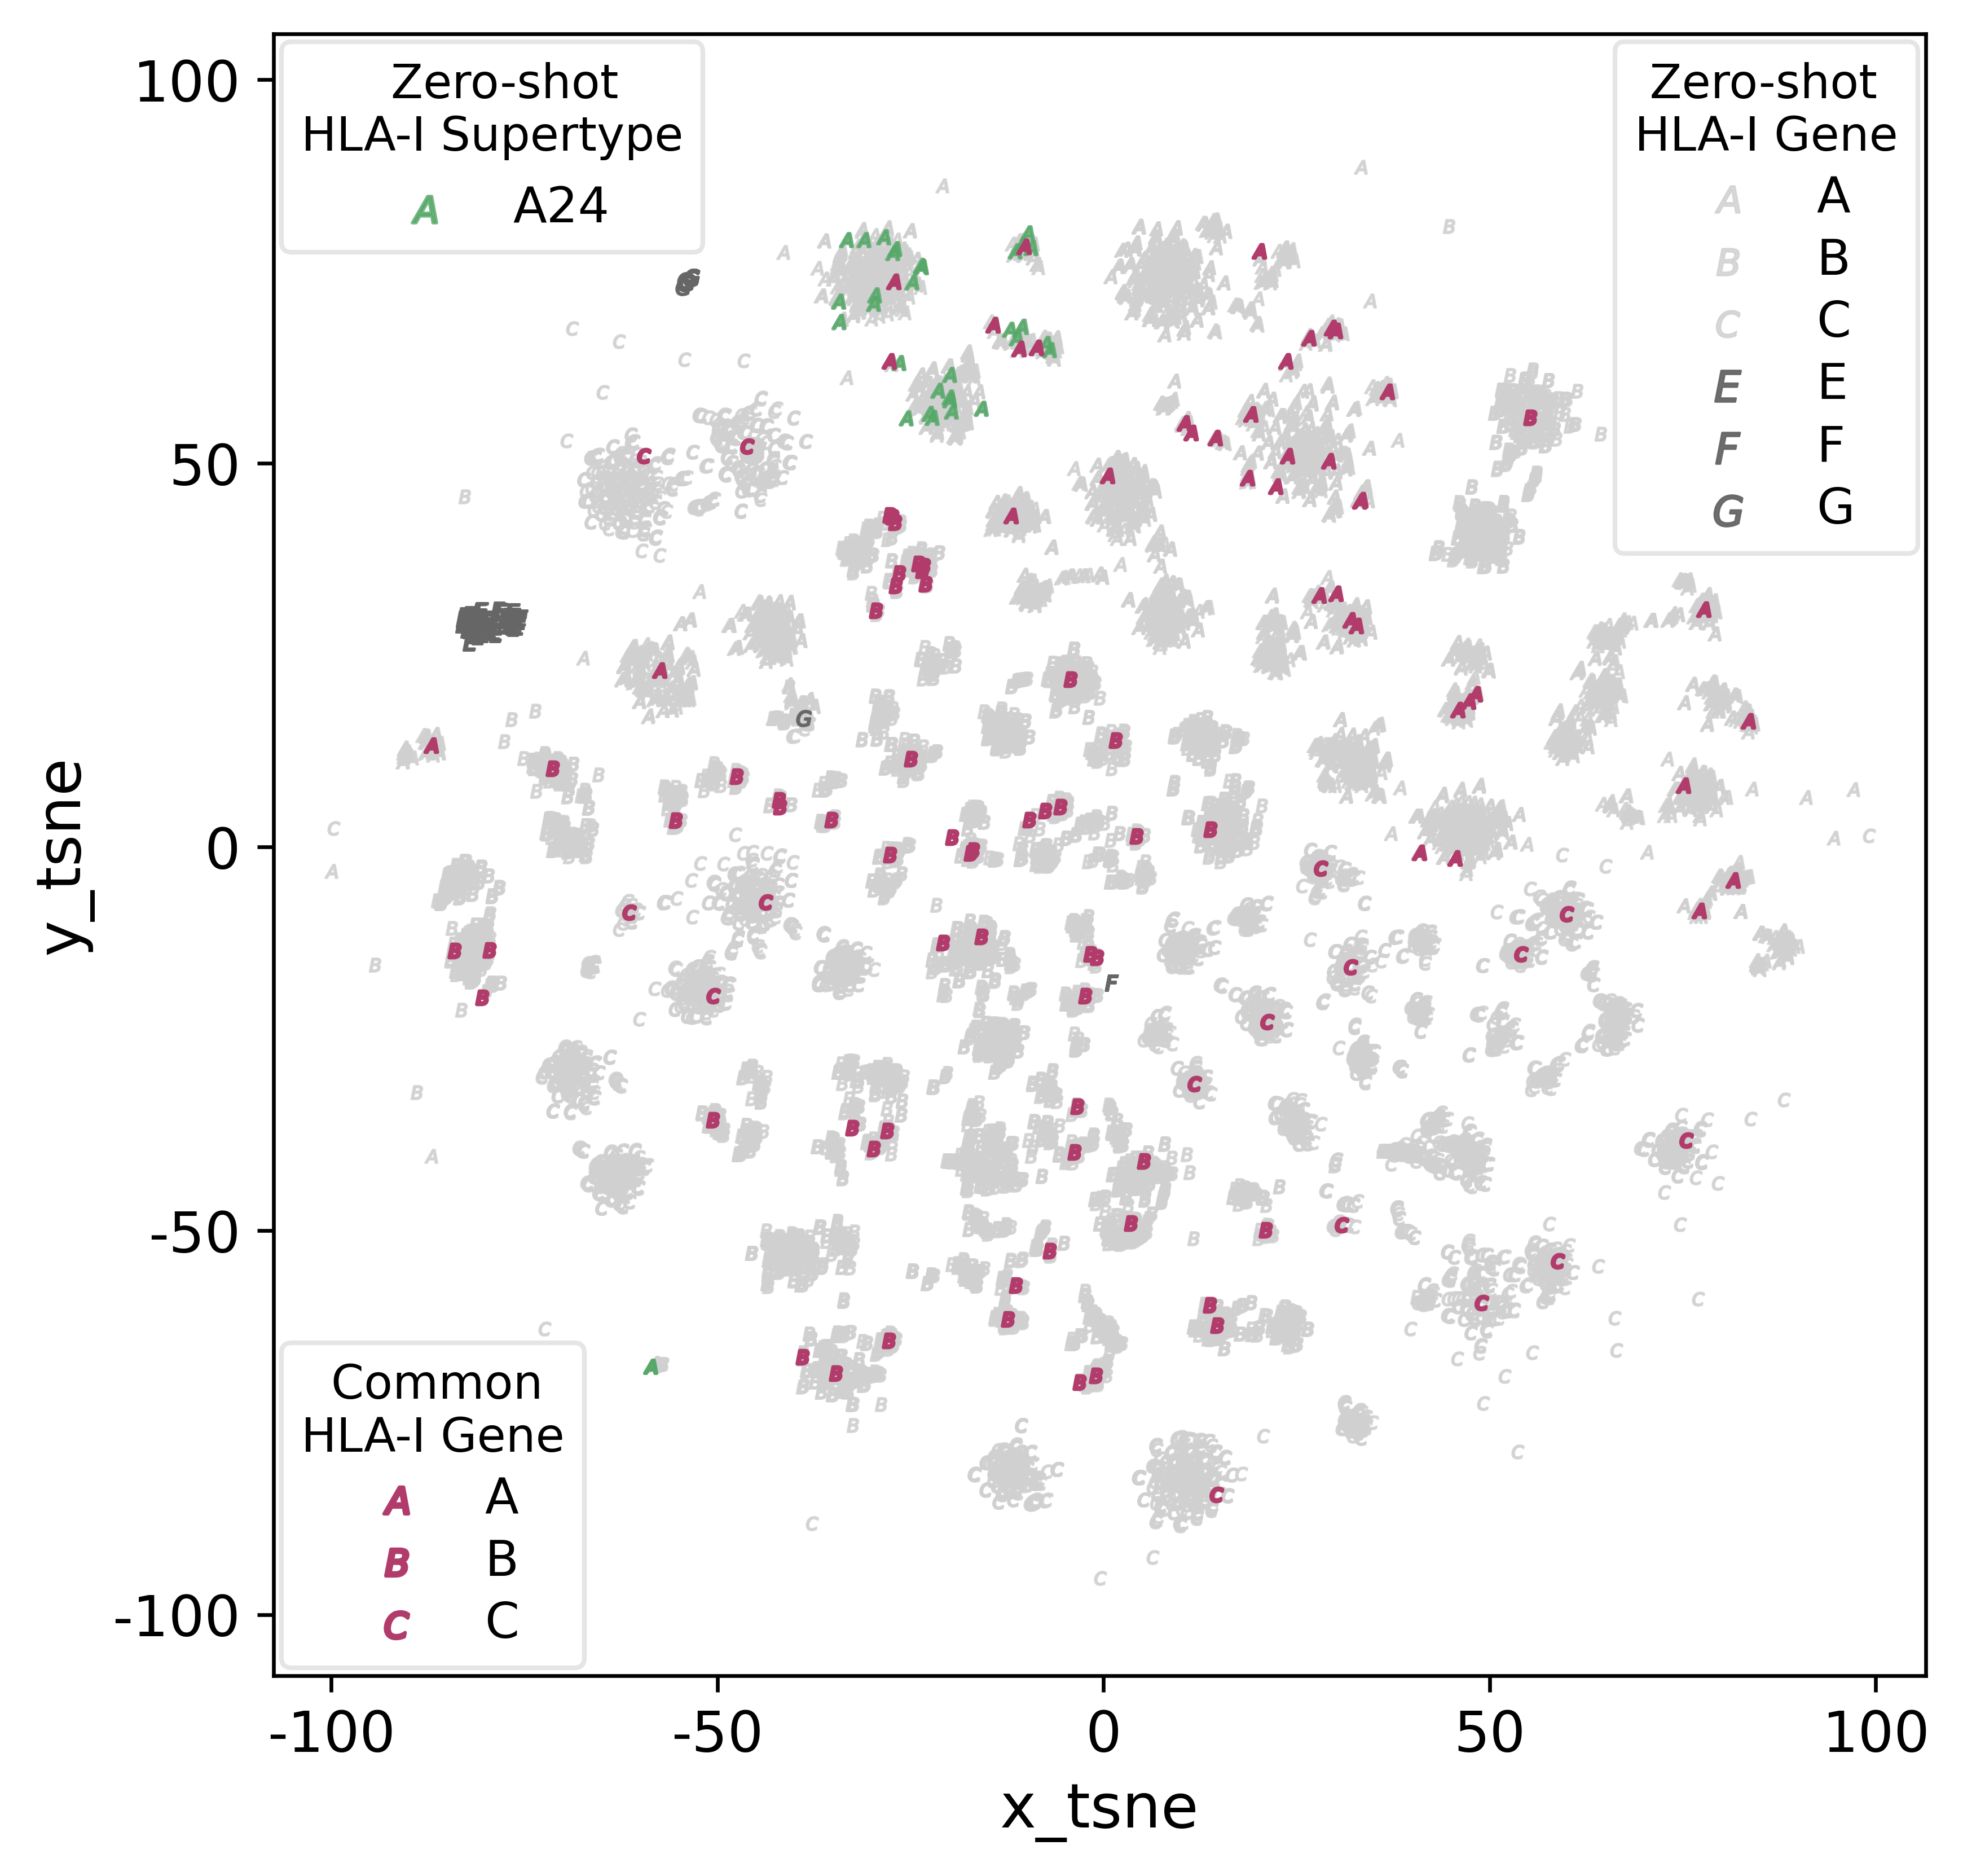

In [17]:
from matplotlib.legend import Legend

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6.3,6.3))
# fig = plt.figure()
ax = fig.add_subplot()

markers = {"A":"$A$", "B":"$B$", "C":"$C$", "E":"$E$", "F":"$F$", "G":"$G$"}
sizes = {"A":8, "B":8, "C":8, "E":11, "F":11, "G":11}
allotypes = ['A', 'B', 'C', 'E', 'F', 'G']

df_tsne_zeroshot = df_tsne[df_tsne['class(dataset)']=="No binders"]
sca_zeroshot = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#d0d0d0', s=sizes[allotype], alpha=0.8, linewidths=0.4,
                label=allotype
                )                            # light gray
    sca_zeroshot.append(sca)
for allotype in allotypes[3:]:
    sca = ax.scatter(df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_zeroshot[df_tsne_zeroshot["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#666666', s=sizes[allotype], alpha=0.95, linewidths=0.4,
                label=allotype
                )                            # dark gray
    sca_zeroshot.append(sca)

selected_supertype = "A24"
df_tsne_zs_A24 = df_tsne_zeroshot[df_tsne_zeroshot["class(supertype)"]==selected_supertype]
sca_a24 = ax.scatter(df_tsne_zs_A24.iloc[:,0], 
                df_tsne_zs_A24.iloc[:,1], 
                marker=markers[selected_supertype[0]], c='#55a868',
                s=sizes[selected_supertype[0]], alpha=0.8, linewidths=0.65,
                label=selected_supertype
                )

df_tsne_common = df_tsne[df_tsne['class(dataset)']=="Common"]
sca_common = []
for allotype in allotypes[:3]:
    sca = ax.scatter(df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,0], 
                df_tsne_common[df_tsne_common["class(allotype)"]==allotype].iloc[:,1], 
                marker=markers[allotype], c='#b13c6c', s=sizes[allotype], linewidths=0.75,
                label=allotype)
    sca_common.append(sca)

ax.set_xlabel('x_tsne', fontsize=13)
ax.set_ylabel('y_tsne', fontsize=13)
ax.set_xlim((-107.5,106.5))
ax.set_ylim((-108,106))
ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_xticklabels([-100,-50,0,50,100], fontsize=12)
ax.set_yticklabels([-100,-50,0,50,100], fontsize=12)

ax.legend(handles=sca_zeroshot, title=" Zero-shot\nHLA-I Gene", frameon=True, title_fontsize=10,
           framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='upper right', labelspacing=0.3,
           bbox_to_anchor=[1.01,1.01],
        #    facecolor="#a1c9f4"
           )
leg2 = Legend(ax, sca_common, labels=['A','B','C'], title="  Common\nHLA-I Gene", frameon=True, title_fontsize=10,
              framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='lower left', labelspacing=0.3,
              bbox_to_anchor=[-0.01,-0.01],
            #   facecolor="#a1c9f4"
              )
ax.add_artist(leg2)
leg3 = Legend(ax, [sca_a24], labels=["A24"], title="      Zero-shot\nHLA-I Supertype", frameon=True, title_fontsize=10,
              framealpha=0.5, ncol=1, fontsize=10.5, markerscale=2, loc='upper left',
              bbox_to_anchor=[-0.01,1.01]
              )
ax.add_artist(leg3)

# plt.savefig("./pngs/1-3_modified.svg", format='svg', dpi=600, bbox_inches='tight')
# plt.savefig("./pngs/1-3_modified.png", dpi=600, bbox_inches='tight')
plt.show()